In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import sys
# define the path where my modules are saved
sys.path.insert(0, "/home/m/m300909/Feedback-varied-rotations")

from my_functions import cir_func as cf, basic_func as bf, rad_func as rf, inversion_func as invf

# Control scenario

In [3]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['003125x', '00625x', '0125x', '025x', '05x', '1x', '2x', '4x', '8x']
#experiment = ['003125x', '00625x']
output_dir = '/newdata/'
model = '_echam6'
file_type = '_BOT'
time = '_1976_2015'
suffix = '.nc'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

In [4]:
ctrl = {}

rotation = ['1/32', '1/16', '1/8', '1/4', '1/2', 'Earth-like', '2', '4', '8']
#rotation = ['1/32', '1/16']

for i, rot in enumerate(rotation):
    ctrl[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

# Warming scenario

In [5]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_1K = {}

for i, rot in enumerate(rotation):
    warm_1K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [6]:
sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_2K = {}

for i, rot in enumerate(rotation):
    warm_2K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [7]:
sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_3K = {}

for i, rot in enumerate(rotation):
    warm_3K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [8]:
sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_4K = {}

for i, rot in enumerate(rotation):
    warm_4K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [9]:
data_2D = {
    'ctrl': ctrl, 
    '1K': warm_1K,
    '2K': warm_2K,
    '3K': warm_3K,
    '4K': warm_4K
}

# Clear-sky response

In [27]:
import itertools as it

cm2 = plt.cm.OrRd(np.linspace(0, 1, 6))[1:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

warm_response = {}
for key, variable in data_2D.items():
    
    # Convert data to xarray
    lw_flux = bf.dict_to_xarray(variable, 'traf0', 
                                ('rotation',rotation), time_slice)
    sw_flux = bf.dict_to_xarray(variable, 'sraf0', 
                                ('rotation',rotation), time_slice)
    rad_flux = lw_flux + sw_flux
    
    
    if key == 'ctrl':
        rad_flux_pre = rad_flux
        continue
    else:

        rad_flux_diff = rad_flux - rad_flux_pre

        rad_flux_diff_mean = bf.global_mean_weighted(rad_flux_diff)
        rad_flux_diff_error = bf.global_std_error(rad_flux_diff)
   
        rad_flux_pre = rad_flux

    color2 = color_map.get(key, next(color_cycle))

    warm_response.setdefault(key, {})['clear sky'] = {
        'mean': rad_flux_diff_mean,
        'error': rad_flux_diff_error,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

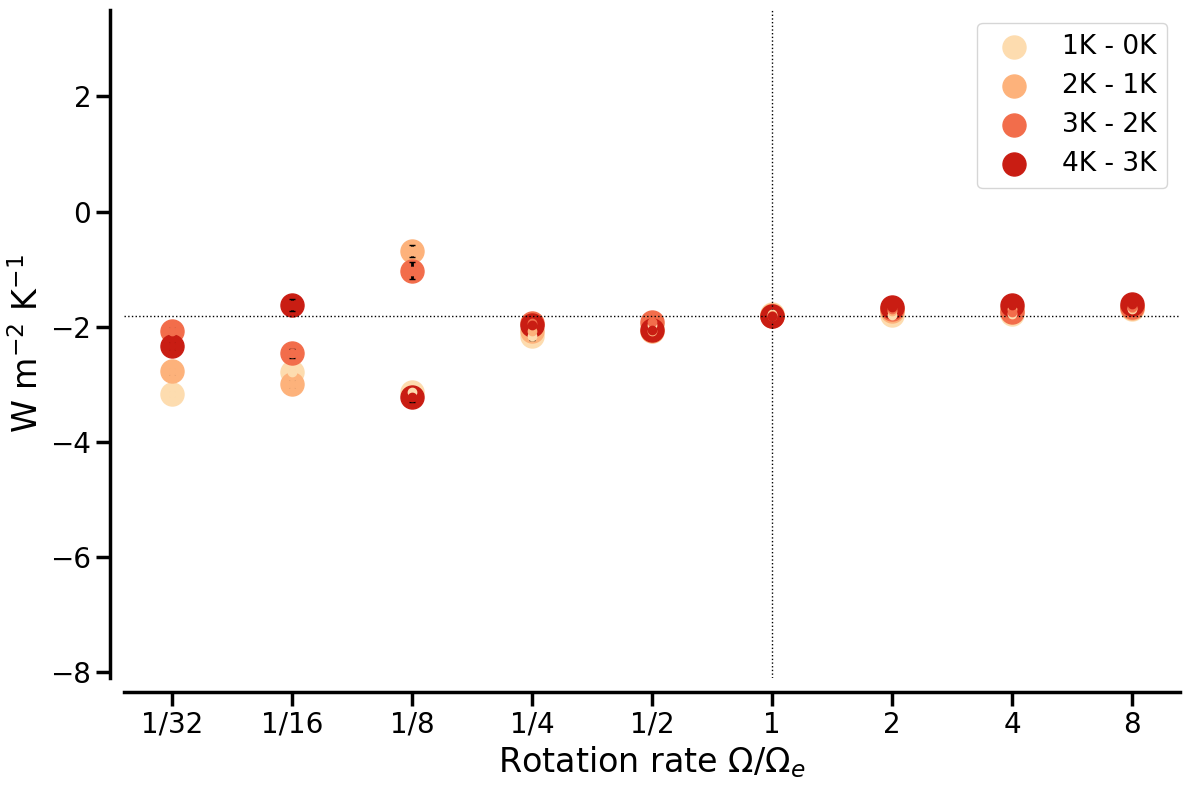

In [12]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'clear-sky feedback / W m$^{-2}$ K$^{-1}$'
ylabel = 'W m$^{-2}$ K$^{-1}$'
y_lim = [-3.6,-0.3]
y_lim = [-8.1,3.5]
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))


for i, (key, var) in enumerate(warm_response.items()):
    #if key in ['2K','3K']:
        #continue
    y = var['clear sky']['mean'] 
    std = var['clear sky']['error']
    color = var['clear sky']['color']

    ax.scatter(x, y, color = color, label = labels[i], 
            marker = 'o', s = 275)
    #ax.plot(x, y, color = color, linewidth = 4)
    ax.errorbar(x, y , yerr = std, fmt = 'o', color = color, 
                        ecolor='black', elinewidth=2, capsize=2)
    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
ax.set_ylim(y_lim[0],y_lim[1])
#ax.yaxis.set_inverted(True)


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'upper right')
plt.axhline(y=y[5], color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=5, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/clrsky_lw.pdf')

# All-sky response

In [44]:
import itertools as it

cm2 = plt.cm.Greens(np.linspace(0, 1, 6))[1:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

for key, variable in data_2D.items():
    
    # Convert data to xarray
    lw_flux = bf.dict_to_xarray(variable, 'trad0', 
                                ('rotation',rotation), time_slice)
    sw_flux = bf.dict_to_xarray(variable, 'srad0', 
                                ('rotation',rotation), time_slice)
    rad_flux = lw_flux + sw_flux
    
    
    if key == 'ctrl':
        rad_flux_pre = rad_flux
        continue
    else:

        rad_flux_diff = rad_flux - rad_flux_pre

        rad_flux_diff_mean = bf.global_mean_weighted(rad_flux_diff)
        rad_flux_diff_error = bf.global_std_error(rad_flux_diff)
   
        rad_flux_pre = rad_flux

    color2 = color_map.get(key, next(color_cycle))

    warm_response.setdefault(key, {})['all sky'] = {
        'mean': rad_flux_diff_mean,
        'error': rad_flux_diff_error,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

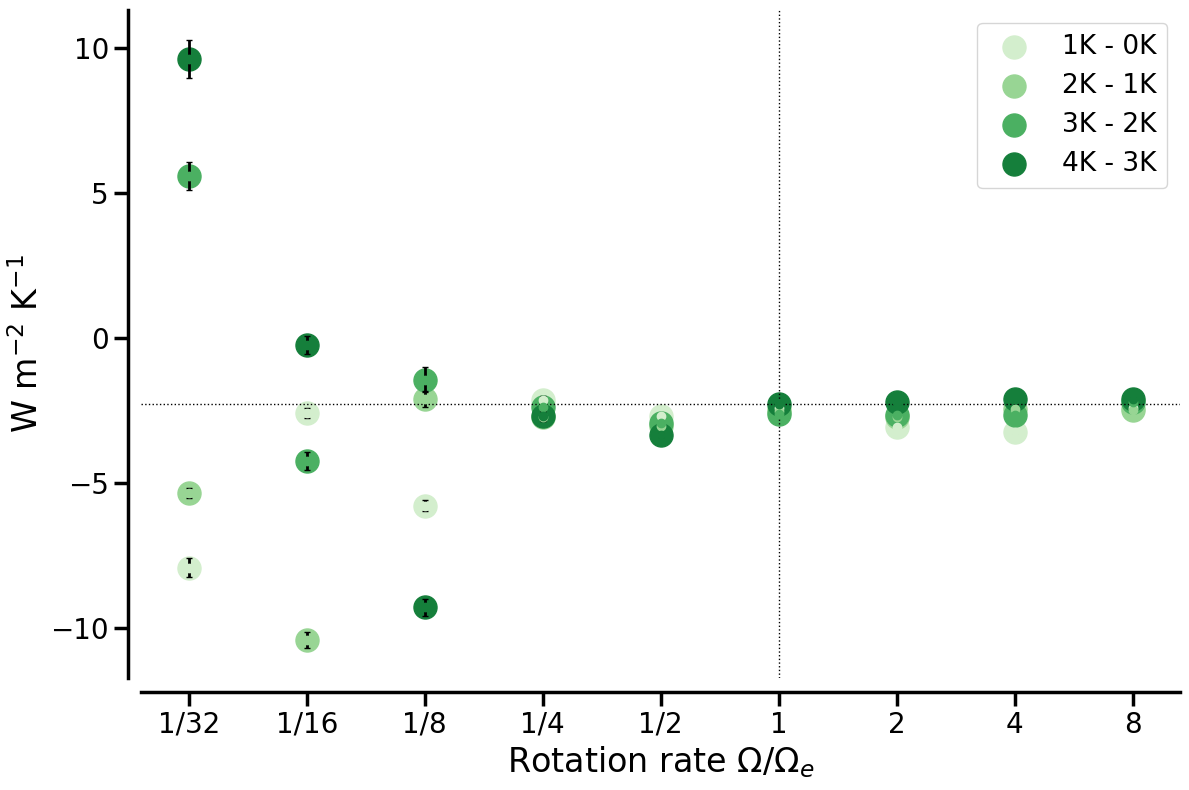

In [32]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'clear-sky feedback / W m$^{-2}$ K$^{-1}$'
ylabel = 'W m$^{-2}$ K$^{-1}$'
y_lim = [-3.6,-0.3]
y_lim = [-8.1,3.5]
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))


for i, (key, var) in enumerate(warm_response.items()):
    #if key in ['2K','3K']:
        #continue
    y = var['all sky']['mean'] 
    std = var['all sky']['error']
    color = var['all sky']['color']

    ax.scatter(x, y, color = color, label = labels[i], 
            marker = 'o', s = 275)
    #ax.plot(x, y, color = color, linewidth = 4)
    ax.errorbar(x, y , yerr = std, fmt = 'o', color = color, 
                        ecolor='black', elinewidth=2, capsize=2)
    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
#ax.set_ylim(y_lim[0],y_lim[1])
#ax.yaxis.set_inverted(True)


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'upper right')
plt.axhline(y=y[5], color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=5, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/allsky_response.pdf')

# Cloud response

In [41]:
import itertools as it

time_slice = slice(19860131.996528,20151231.996528)
cm1 = plt.cm.Greens(np.linspace(0, 1, 7))[2:]
color_map = {'1': 'grey'}
color_cycle1 = it.cycle(cm1) 

cm2 = plt.cm.Blues(np.linspace(0, 1, 7))[2:]
color_map = {'1': 'grey'}
color_cycle2 = it.cycle(cm2) 

cm3 = plt.cm.RdPu(np.linspace(0, 1, 7))[2:]
color_map = {'1': 'grey'}
color_cycle3 = it.cycle(cm3) 


for key, variable in data_2D.items():
    
    # Convert data to xarray
    lw_flux = bf.dict_to_xarray(variable, 'trad0', 
                                ('rotation',rotation), time_slice)
    sw_flux = bf.dict_to_xarray(variable, 'srad0', 
                                ('rotation',rotation), time_slice)
    clrlw_flux = bf.dict_to_xarray(variable, 'traf0', 
                                ('rotation',rotation), time_slice)
    clrsw_flux = bf.dict_to_xarray(variable, 'sraf0', 
                                ('rotation',rotation), time_slice)
    
    cloud_rad_flux = (lw_flux + sw_flux) - (clrlw_flux + clrsw_flux)
    
    cloud_sw_flux = sw_flux - clrsw_flux
    cloud_lw_flux = lw_flux - clrlw_flux
    
    
    if key == 'ctrl':
        cloud_rad_flux_pre = cloud_rad_flux
        cloud_sw_flux_pre = cloud_sw_flux
        cloud_lw_flux_pre = cloud_lw_flux
        continue
    else:

        rad_flux_diff = cloud_rad_flux - cloud_rad_flux_pre
        cloud_sw_flux_diff = cloud_sw_flux - cloud_sw_flux_pre
        cloud_lw_flux_diff = cloud_lw_flux - cloud_lw_flux_pre

        rad_flux_diff_mean = bf.global_mean_weighted(rad_flux_diff)
        rad_flux_diff_error = bf.global_std_error(rad_flux_diff)
        
        sw_flux_diff_mean = bf.global_mean_weighted(cloud_sw_flux_diff)
        sw_flux_diff_error = bf.global_std_error(cloud_sw_flux_diff)
        
        lw_flux_diff_mean = bf.global_mean_weighted(cloud_lw_flux_diff)
        lw_flux_diff_error = bf.global_std_error(cloud_lw_flux_diff)
   
        cloud_rad_flux_pre = cloud_rad_flux
        cloud_sw_flux_pre = cloud_sw_flux
        cloud_lw_flux_pre = cloud_lw_flux

    color1 = color_map.get(key, next(color_cycle1))
    color2 = color_map.get(key, next(color_cycle2))
    color3 = color_map.get(key, next(color_cycle3))

    warm_response.setdefault(key, {})['cloud'] = {
        'mean': rad_flux_diff_mean,
        'error': rad_flux_diff_error,
        'color': color1
    }
    
    warm_response.setdefault(key, {})['sw cloud'] = {
        'mean': sw_flux_diff_mean,
        'error': sw_flux_diff_error,
        'color': color2
    }
    
    warm_response.setdefault(key, {})['lw cloud'] = {
        'mean': lw_flux_diff_mean,
        'error': lw_flux_diff_error,
        'color': color3
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

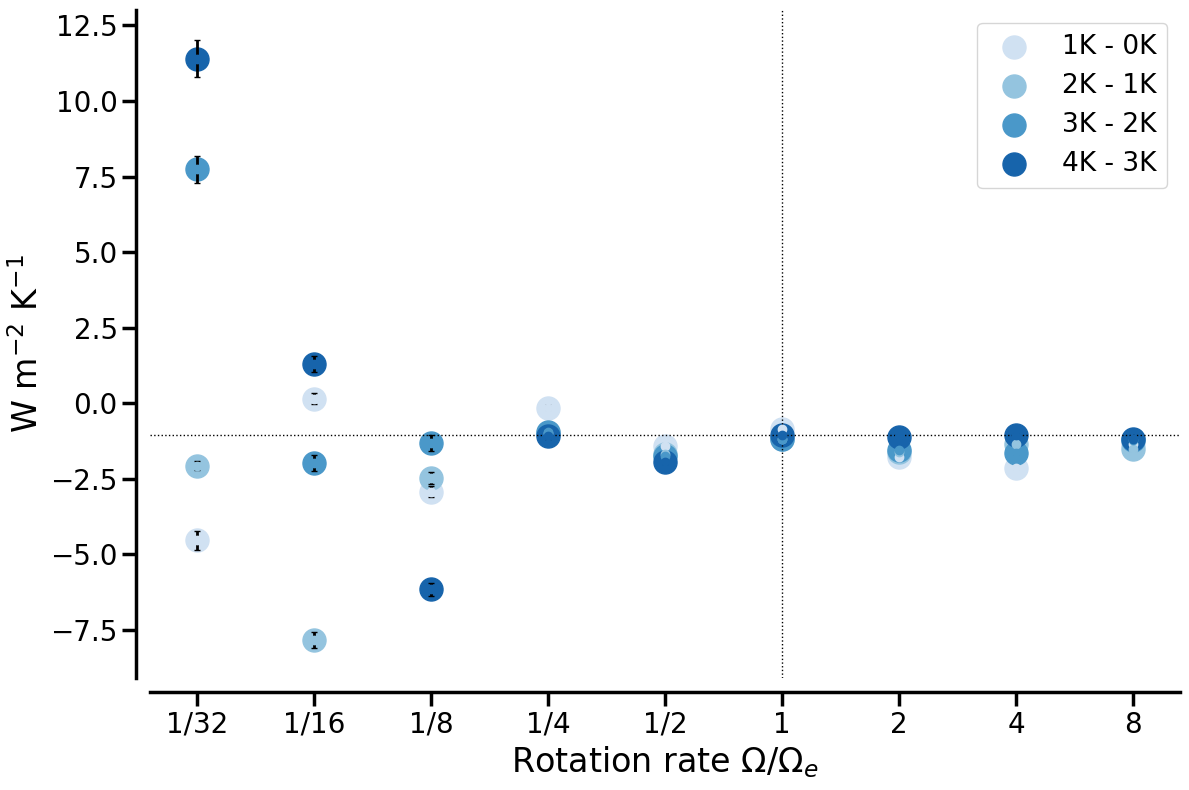

In [ ]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'clear-sky feedback / W m$^{-2}$ K$^{-1}$'
ylabel = 'W m$^{-2}$ K$^{-1}$'
y_lim = [-3.6,-0.3]
y_lim = [-8.1,3.5]
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))


for i, (key, var) in enumerate(warm_response.items()):
    #if key in ['2K','3K']:
        #continue
    y = var['sw cloud']['mean'] 
    std = var['sw cloud']['error']
    color = var['sw cloud']['color']

    ax.scatter(x, y, color = color, label = labels[i], 
            marker = 'o', s = 275)
    #ax.plot(x, y, color = color, linewidth = 4)
    ax.errorbar(x, y , yerr = std, fmt = 'o', color = color, 
                        ecolor='black', elinewidth=2, capsize=2)
    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
#ax.set_ylim(y_lim[0],y_lim[1])
#ax.yaxis.set_inverted(True)


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'upper right')
plt.axhline(y=y[5], color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=5, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/sw_response.pdf')

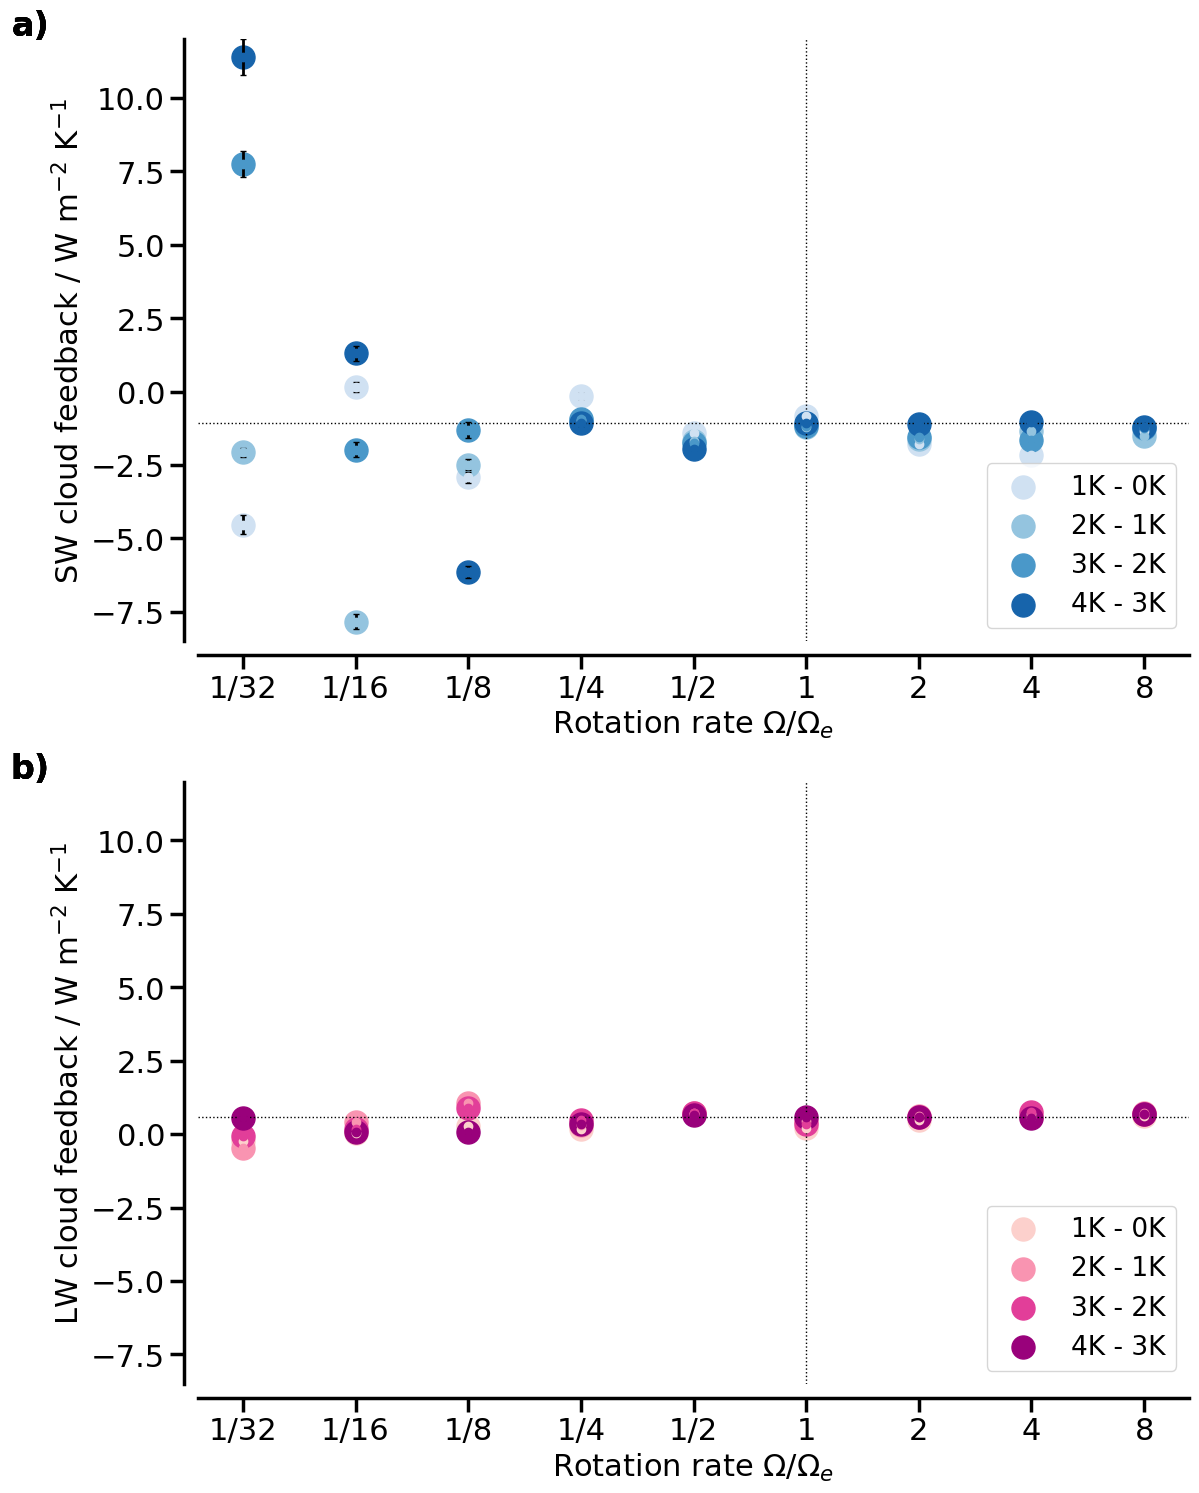

In [50]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))#, sharex=True, sharey='col')
axes = axes.ravel()

def configure_axes(ax, ylabel, ylim=None, xlabel=False, set_ticks=False):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.set_ylabel(ylabel, fontsize=22)
    ax.xaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    if xlabel:
        ax.set_xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=22)
    if ylim:
        ax.set_ylim(ylim)
    if set_ticks:
        ax.xaxis.set_ticks(x)
        ax.set_xticklabels([x for x in ticks])

# Iterate over axes

ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))
subplot_labels = ['a)', 'b)', 'c)']
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

for j, (key, var) in enumerate(warm_response.items()):
    for i, ax in enumerate(axes):

        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

        if i == 0:
            var_name = var['sw cloud']['mean']
            std = var['sw cloud']['error']
            color = var['sw cloud']['color']
            ylabel = 'SW cloud feedback / W m$^{-2}$ K$^{-1}$'
            y_lim = [-8.5,12]
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, set_ticks=[x, ticks])
        elif i == 1:
            var_name = var['lw cloud']['mean']
            std = var['lw cloud']['error']
            color = var['lw cloud']['color']
            ylabel = 'LW cloud feedback / W m$^{-2}$ K$^{-1}$'
            y_lim = [-8.5,12]
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, set_ticks=[x, ticks])

        ax.scatter(x, var_name, color=color, label=labels[j], marker='o', s=275)
        ax.errorbar(x, var_name, yerr=std, fmt='o', color=color, 
                    ecolor='black', elinewidth=2, capsize=2)

        ax.legend(fontsize=19, loc='lower right')
        if key in ['4K']:
            ax.axhline(y=var_name[5], color='k', linewidth=1, linestyle='dotted')
            ax.axvline(x=5, color='k', linewidth=1, linestyle='dotted')

plt.tight_layout()
plt.savefig('Figures/cloud_feedback.pdf')

# All response plot

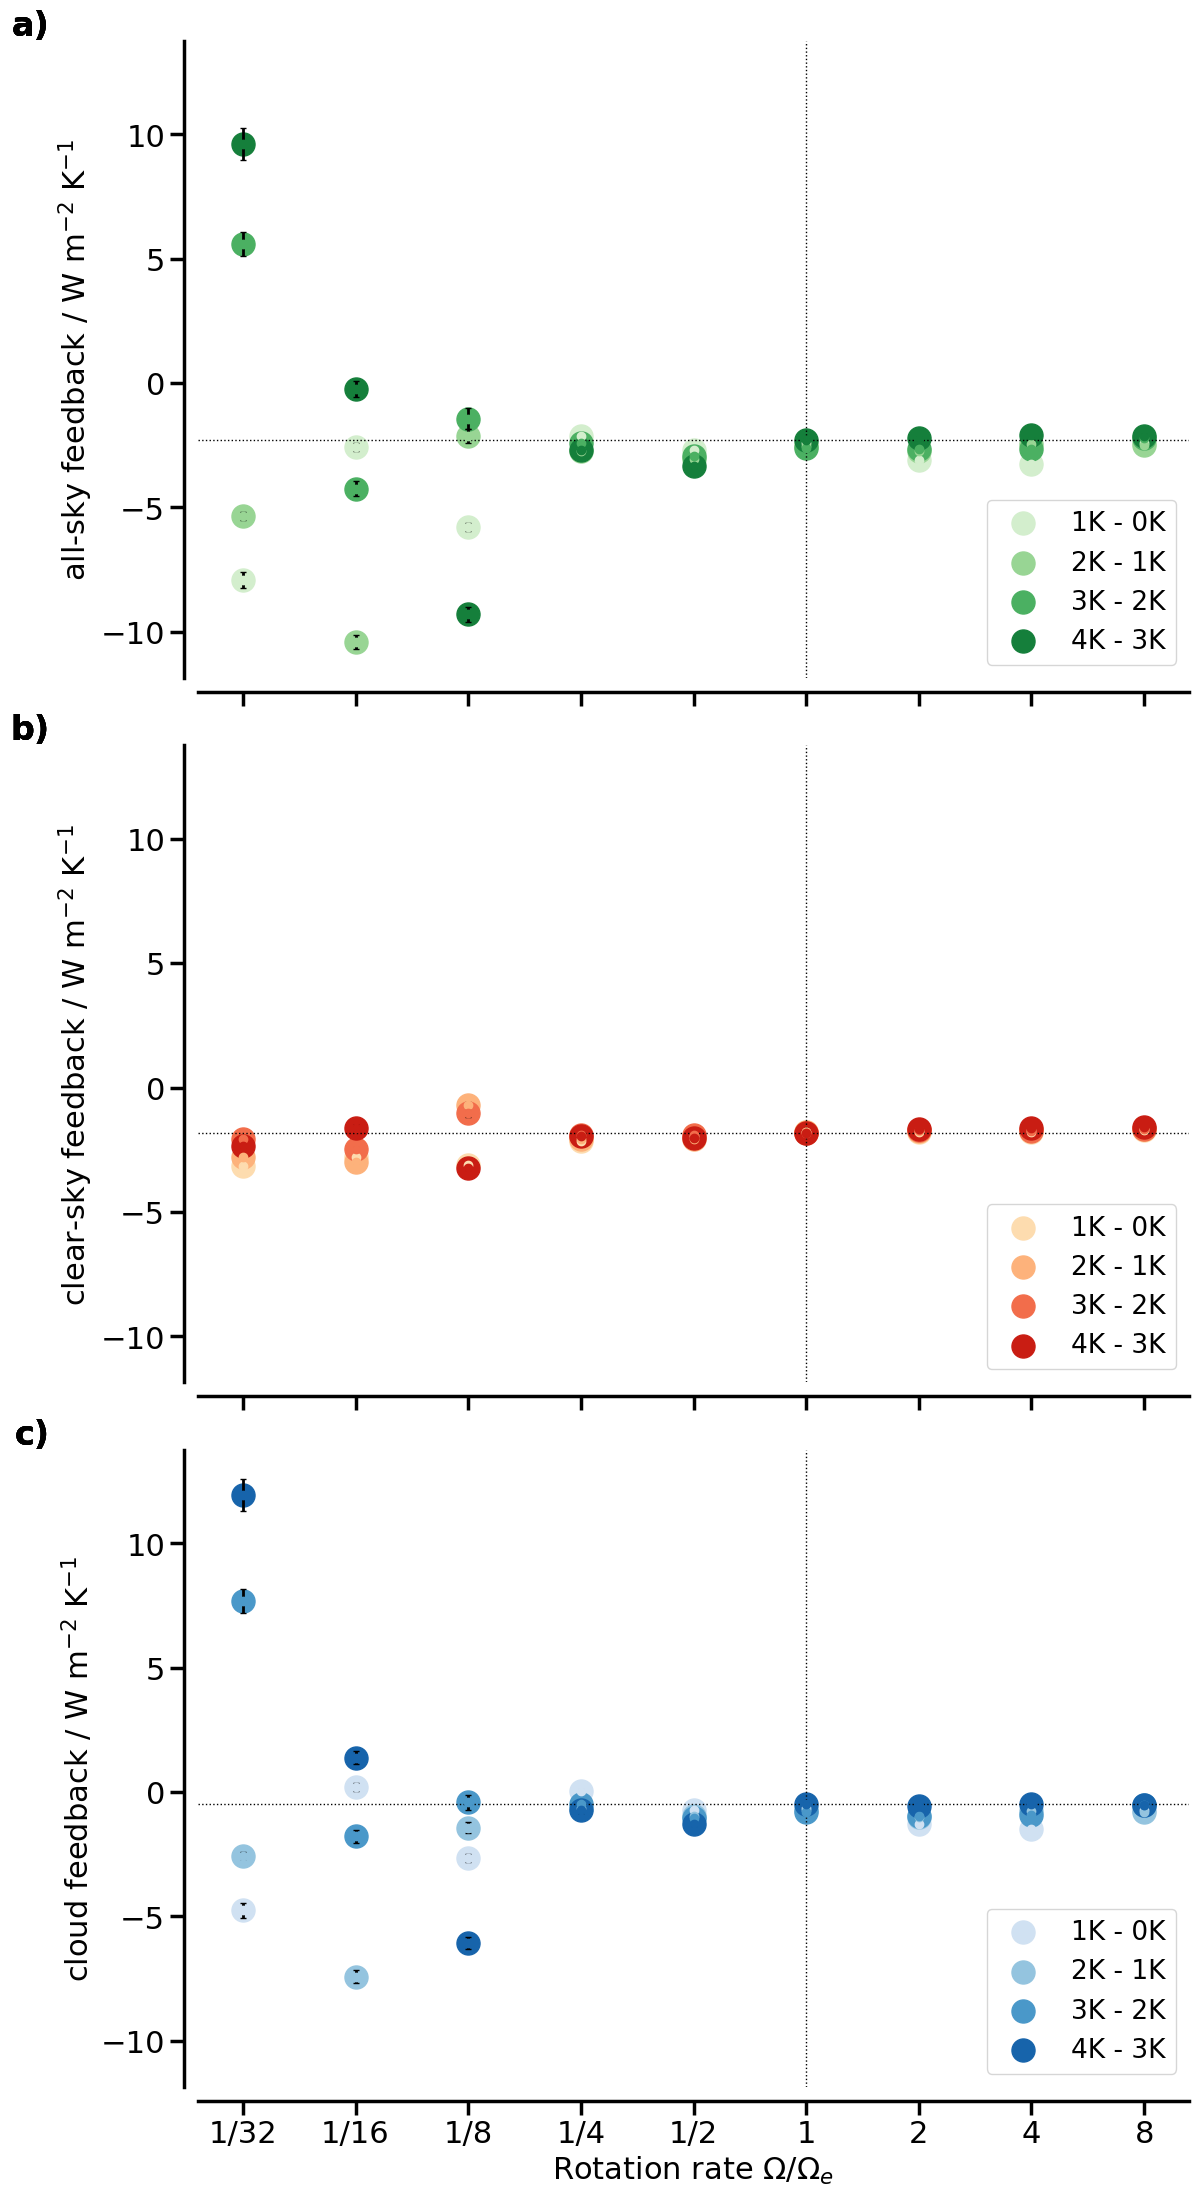

In [42]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 22), sharex=True, sharey='col')
axes = axes.ravel()

def configure_axes(ax, ylabel, ylim=None, xlabel=False, set_ticks=False):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.set_ylabel(ylabel, fontsize=22)
    ax.xaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    if xlabel:
        ax.set_xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=22)
    #if ylim:
        #ax.set_ylim(ylim)
    if set_ticks:
        ax.xaxis.set_ticks(x)
        ax.set_xticklabels([x for x in ticks])

# Iterate over axes

ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))
subplot_labels = ['a)', 'b)', 'c)']

for j,(key, var) in enumerate(warm_response.items()):
    for i, ax in enumerate(axes):

        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

    
        if i == 0:
            var_name = var['all sky']['mean']
            std = var['all sky']['error']
            color = var['all sky']['color']
            ylabel = 'all-sky feedback / W m$^{-2}$ K$^{-1}$'
            y_lim = [-8.2,3.5]
            configure_axes(ax, ylabel, ylim=y_lim)
        elif i == 1:
            var_name = var['clear sky']['mean']
            std = var['clear sky']['error']
            color = var['clear sky']['color']
            ylabel = 'clear-sky feedback / W m$^{-2}$ K$^{-1}$'
            configure_axes(ax, ylabel, ylim=y_lim)
        elif i == 2:
            var_name = var['cloud']['mean']
            std = var['cloud']['error']
            color = var['sw cloud']['color']
            ylabel = 'cloud feedback / W m$^{-2}$ K$^{-1}$'
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, set_ticks=[x, ticks])

        ax.scatter(x, var_name, color=color, label=labels[j], marker='o', s=275)
        ax.errorbar(x, var_name, yerr=std, fmt='o', color=color, 
                    ecolor='black', elinewidth=2, capsize=2)

        ax.legend(fontsize=19, loc='lower right')
        if key in ['4K']:
            ax.axhline(y=var_name[5], color='k', linewidth=1, linestyle='dotted')
            ax.axvline(x=5, color='k', linewidth=1, linestyle='dotted')

plt.tight_layout()
plt.savefig('Figures/radiative_feedback.pdf')

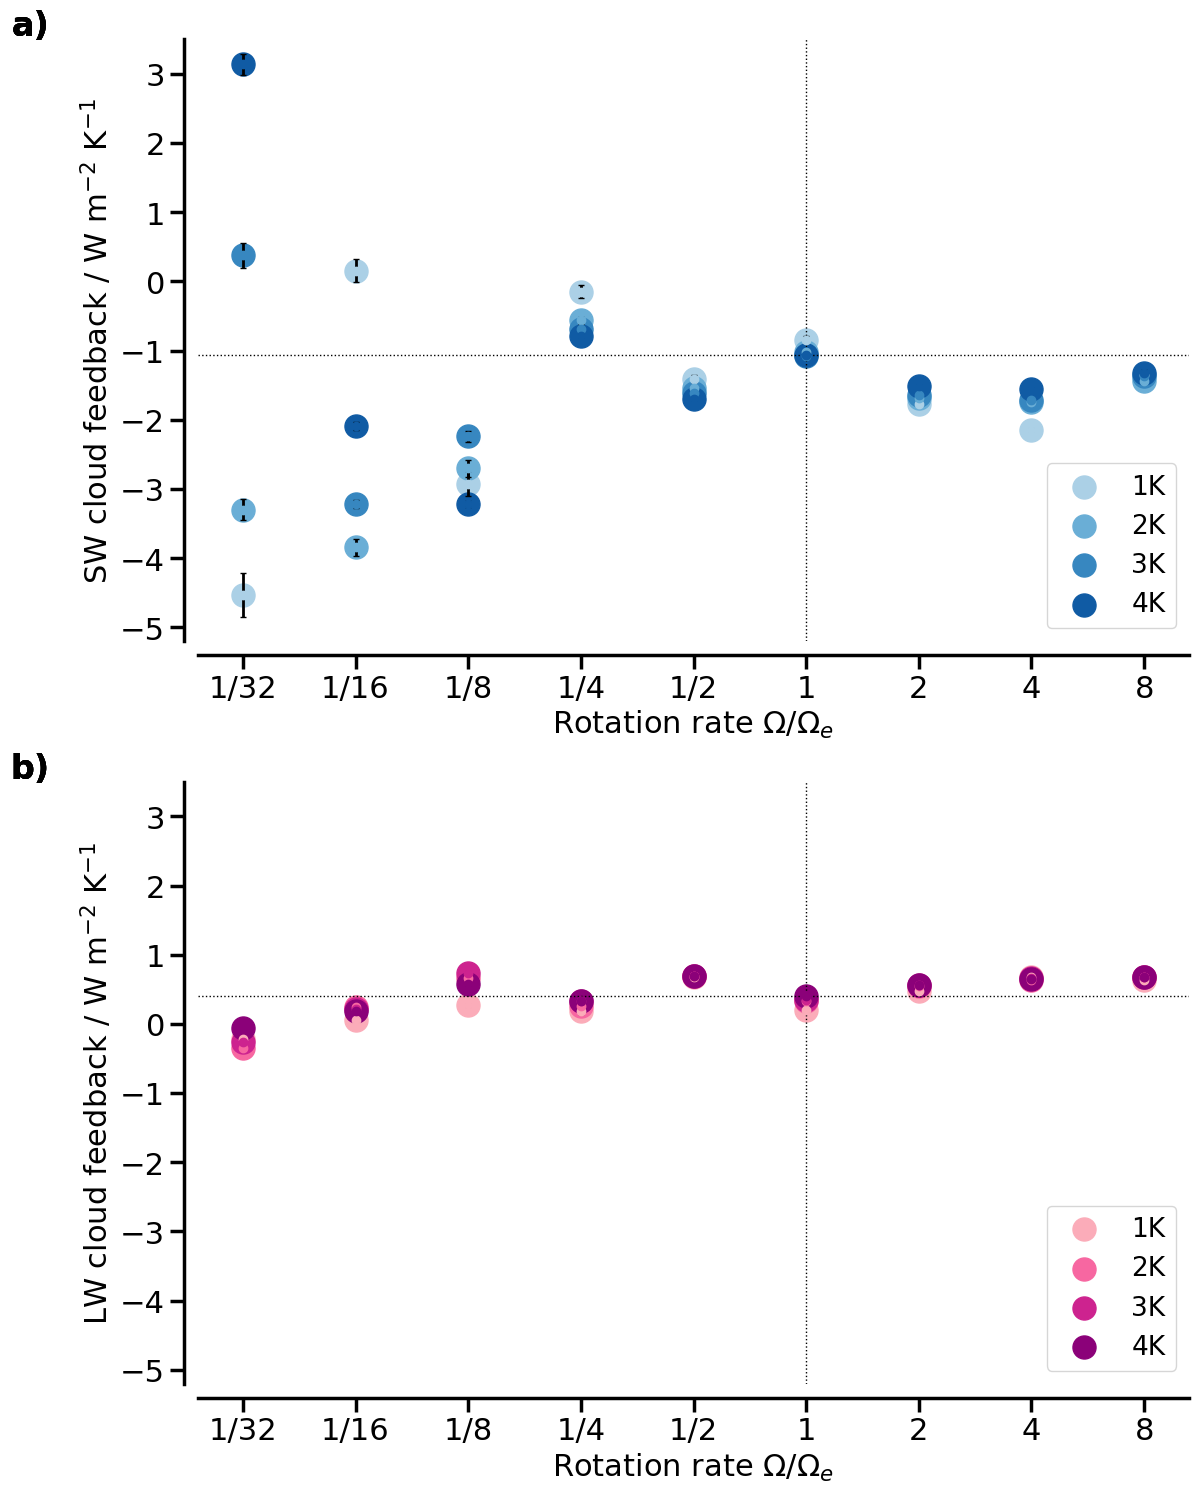

In [100]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))#, sharex=True, sharey='col')
axes = axes.ravel()

def configure_axes(ax, ylabel, ylim=None, xlabel=False, set_ticks=False):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.set_ylabel(ylabel, fontsize=22)
    ax.xaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    if xlabel:
        ax.set_xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=22)
    if ylim:
        ax.set_ylim(ylim)
    if set_ticks:
        ax.xaxis.set_ticks(x)
        ax.set_xticklabels([x for x in ticks])

# Iterate over axes

ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))
#subplot_labels = ['a)', 'b)', 'c)']

for key, var in warm_response.items():
    for i, ax in enumerate(axes):

        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

        if i == 0:
            var_name = var['sw cloud']['mean']
            std = var['sw cloud']['error']
            color = var['sw cloud']['color']
            ylabel = 'SW cloud feedback / W m$^{-2}$ K$^{-1}$'
            y_lim = [-5.2,3.5]
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, set_ticks=[x, ticks])
        elif i == 1:
            var_name = var['lw cloud']['mean']
            std = var['lw cloud']['error']
            color = var['lw cloud']['color']
            ylabel = 'LW cloud feedback / W m$^{-2}$ K$^{-1}$'
            y_lim = [-5.2,3.5]
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, set_ticks=[x, ticks])

        ax.scatter(x, var_name, color=color, label=key, marker='o', s=275)
        ax.errorbar(x, var_name, yerr=std, fmt='o', color=color, 
                    ecolor='black', elinewidth=2, capsize=2)

        ax.legend(fontsize=19, loc='lower right')
        if key in ['4K']:
            ax.axhline(y=var_name[5], color='k', linewidth=1, linestyle='dotted')
            ax.axvline(x=5, color='k', linewidth=1, linestyle='dotted')

plt.tight_layout()
plt.savefig('Figures/cloud_feedback.pdf')

In [22]:
colormap = plt.cm.RdPu(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)

# Precompute control data arrays
lw_allsky_ctrl = bf.dict_to_xarray(data_2D['ctrl'], 'trad0', 
                            ('rotation', rotation) , time_slice)

lw_clrsky_ctrl = bf.dict_to_xarray(data_2D['ctrl'], 'traf0', 
                            ('rotation', rotation) , time_slice)

lw_cloud_ctrl = lw_allsky_ctrl - lw_clrsky_ctrl

tsurf_ctrl = bf.dict_to_xarray(data_2D['ctrl'], 'tsurf', 
                            ('rotation', rotation) , time_slice)

# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_2D.items()):
    if key == 'ctrl':
        continue

    # Convert data to xarray
    lw_allsky = bf.dict_to_xarray(data, 'trad0', 
                                ('rotation', rotation) , time_slice)
    
    lw_clrsky = bf.dict_to_xarray(data, 'traf0', 
                                ('rotation', rotation) , time_slice)
    
    lw_cloud = lw_allsky - lw_clrsky 
    
    tsurf = bf.dict_to_xarray(data, 'tsurf', 
                              ('rotation', rotation) , time_slice)

    # Compute the clear-sky longwave radiation response
    lw_cloud_response = bf.feedback_parameter(lw_cloud, lw_cloud_ctrl, 
                                             tsurf, tsurf_ctrl)
    
    lw_cloud_response_mean = lw_cloud_response.mean(dim=['time','lon'])
    lw_cloud_mean = lw_cloud.mean(dim=['time','lon'])
    lw_cloud_ctrl_mean = lw_cloud_ctrl.mean(dim=['time','lon'])

    # Store the response and associated color
    warm_response[key]['lw cloud'] = {'response': lw_cloud_response_mean,
                                      'effect':lw_cloud_mean,
                                      'ctrl':lw_cloud_ctrl_mean,
                                      'color': colormap[i+1]} 

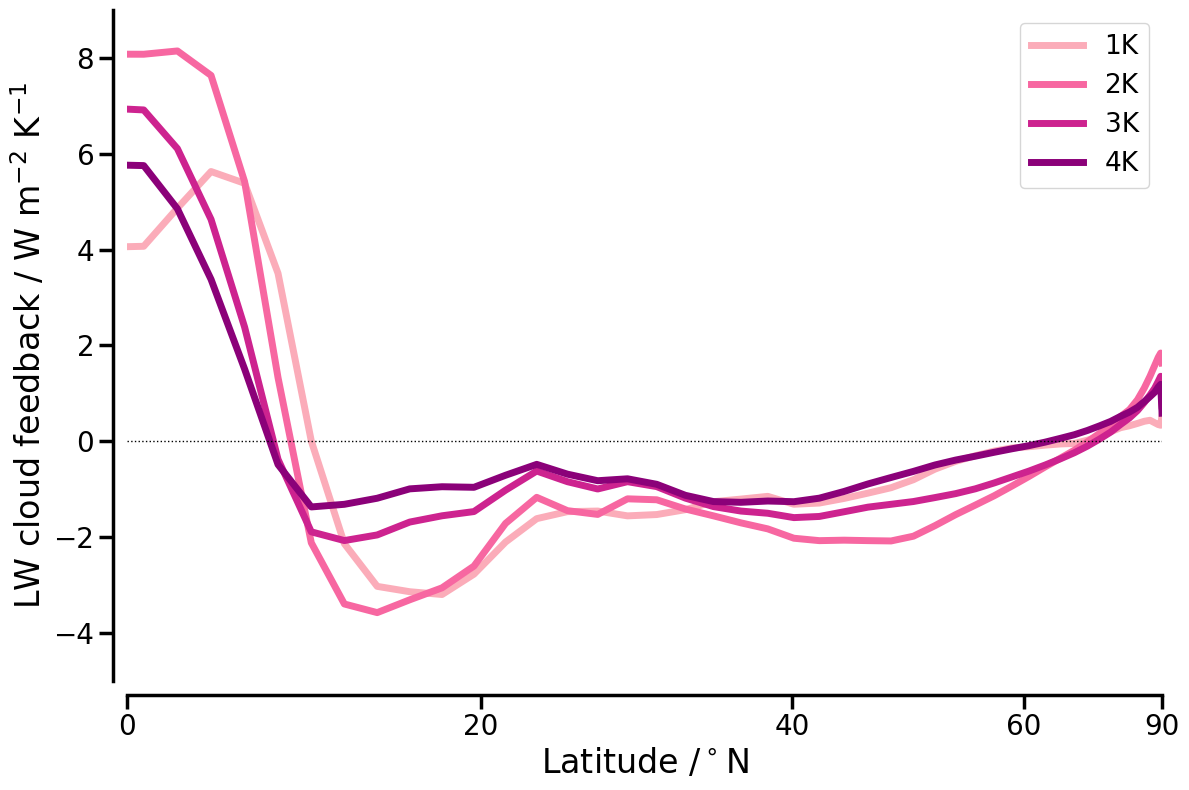

In [23]:
from matplotlib.ticker import ScalarFormatter
y_lim = [-5,9]
ylabel = 'LW cloud feedback / W m$^{-2}$ K$^{-1}$'

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))


#x.plot(x, var['lw cloud']['ctrl'].sel(rotation='1/16'), 
            #color='grey', linewidth=2, linestyle='solid', 
            #label='ctrl')
for key, var in warm_response.items():    
        
    y = var['lw cloud']['response'].sel(rotation='1/32')
    color = var['lw cloud']['color']

    x = np.sin(np.deg2rad(var['lw cloud']['response'].lat))

    ax.plot(x, y, color=color, linewidth=5, linestyle='solid', 
            label=key)

    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
plt.legend(fontsize=19)
ticks_deg = np.array([-90, -60, -40, -20, 0, 20, 40, 60, 90])
ax.set_xticks(np.sin(np.deg2rad(ticks_deg)))
ax.set_xticklabels(ticks_deg)
ax.set_ylabel(ylabel, size=24)
ax.set_xlim(0, np.sin(np.deg2rad(90)))
ax.set_ylim(y_lim)
plt.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')



plt.xlabel('Latitude /'r'$^\circ$N', size=24)
plt.tight_layout()
plt.savefig('Figures/cloud_response.pdf')

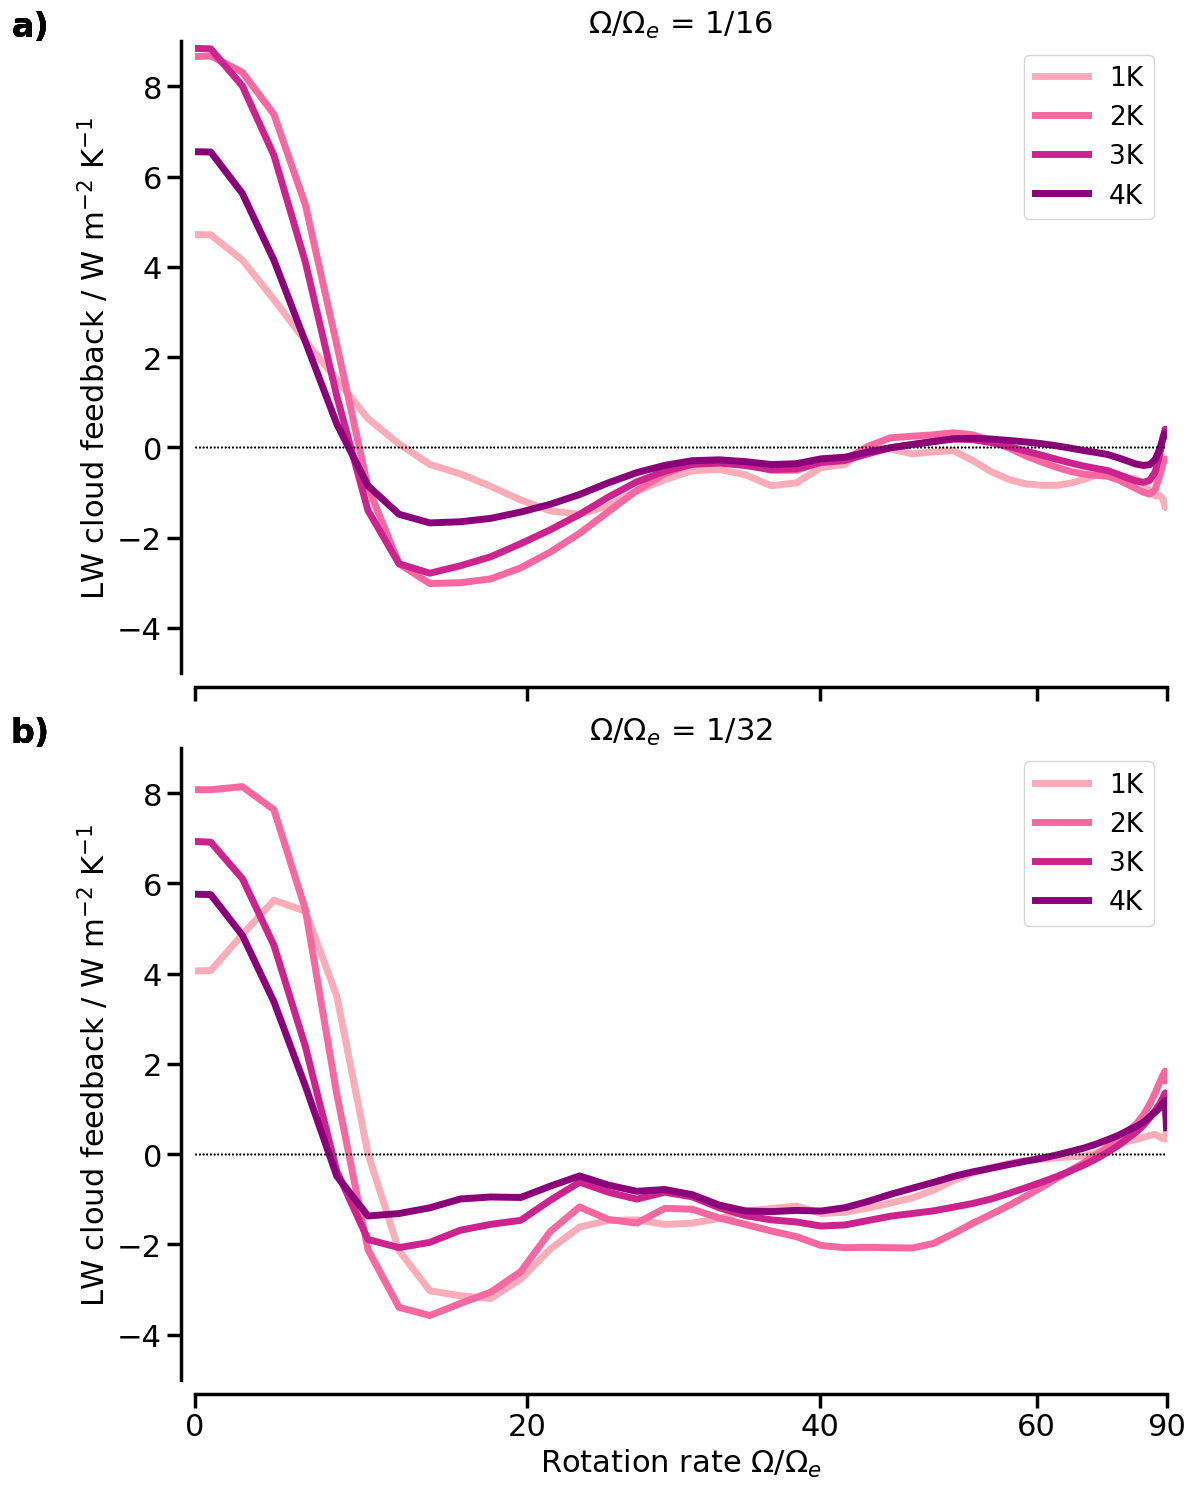

In [24]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15), sharex=True, sharey='col')
axes = axes.ravel()

def configure_axes(ax, ylabel, ylim=None, xlabel=False, title=False):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.set_ylabel(ylabel, fontsize=22)
    ax.xaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    if xlabel:
        ax.set_xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=22)
    if ylim:
        ax.set_ylim(ylim)
    if title:
        ax.set_title(title, size=22)

# Iterate over axes
subplot_labels = ['a)', 'b)', 'c)']

for key, var in warm_response.items():
    for i, ax in enumerate(axes):

        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

        if i == 0:
            var_name = var['lw cloud']['response'].sel(rotation='1/16')
            color = var['lw cloud']['color']
            x = np.sin(np.deg2rad(var['lw cloud']['response'].lat))
            configure_axes(ax, ylabel, ylim=y_lim, title=r'$\Omega/\Omega_e$ = 1/16')
        elif i == 1:
            var_name = var['lw cloud']['response'].sel(rotation='1/32')
            color = var['lw cloud']['color']
            x = np.sin(np.deg2rad(var['lw cloud']['response'].lat))
            ylabel = 'LW cloud feedback / W m$^{-2}$ K$^{-1}$'
            configure_axes(ax, ylabel, ylim=y_lim, xlabel=True, title=r'$\Omega/\Omega_e$ = 1/32')

        ax.plot(x, var_name, color=color, linewidth=5, linestyle='solid', 
            label=key)

        ticks_deg = np.array([-90, -60, -40, -20, 0, 20, 40, 60, 90])
        ax.set_xticks(np.sin(np.deg2rad(ticks_deg)))
        ax.set_xticklabels(ticks_deg)
        ax.set_xlim(0, np.sin(np.deg2rad(90)))
        ax.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')
        ax.legend(fontsize=19, loc='upper right')

plt.tight_layout()
plt.savefig('Figures/lw_cloud_feedback.pdf')

## Cloud fraction

In [15]:
colormap = plt.cm.Blues(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)

cloud = {}

# Precompute control data arrays
#cloud_fraction_ctrl = bf.dict_to_xarray(data_2D['ctrl'], rotation, 'aclcov', time_slice)
#tsurf_ctrl = bf.dict_to_xarray(data_2D['ctrl'], rotation, 'tsurf', time_slice)

# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_2D.items()):
   
    if key == 'ctrl':
        color = 'grey'
    else:
        color = colormap[i+1]

    # Convert data to xarray
    cloud_fraction = bf.dict_to_xarray(data, rotation, 'aclcov', time_slice)
    #tsurf = bf.dict_to_xarray(data, rotation, 'tsurf', time_slice)

    # Compute the clear-sky longwave radiation response
    #cloud_fraction_response = fun.feedback_parameter(cloud_fraction_ctrl, cloud_fraction, 
    #                                         tsurf_ctrl, tsurf)
    
    cloud_fraction_response_mean = bf.global_mean_weighted(cloud_fraction)
    cloud_fraction_response_error = bf.global_std_error(cloud_fraction)

    if key not in cloud:
        cloud[key] = {}

    # Store the response and associated color
    cloud[key]['cloud fraction'] = {'mean': cloud_fraction_response_mean, 
                                    'error':cloud_fraction_response_error,
                                     'color': color}
         

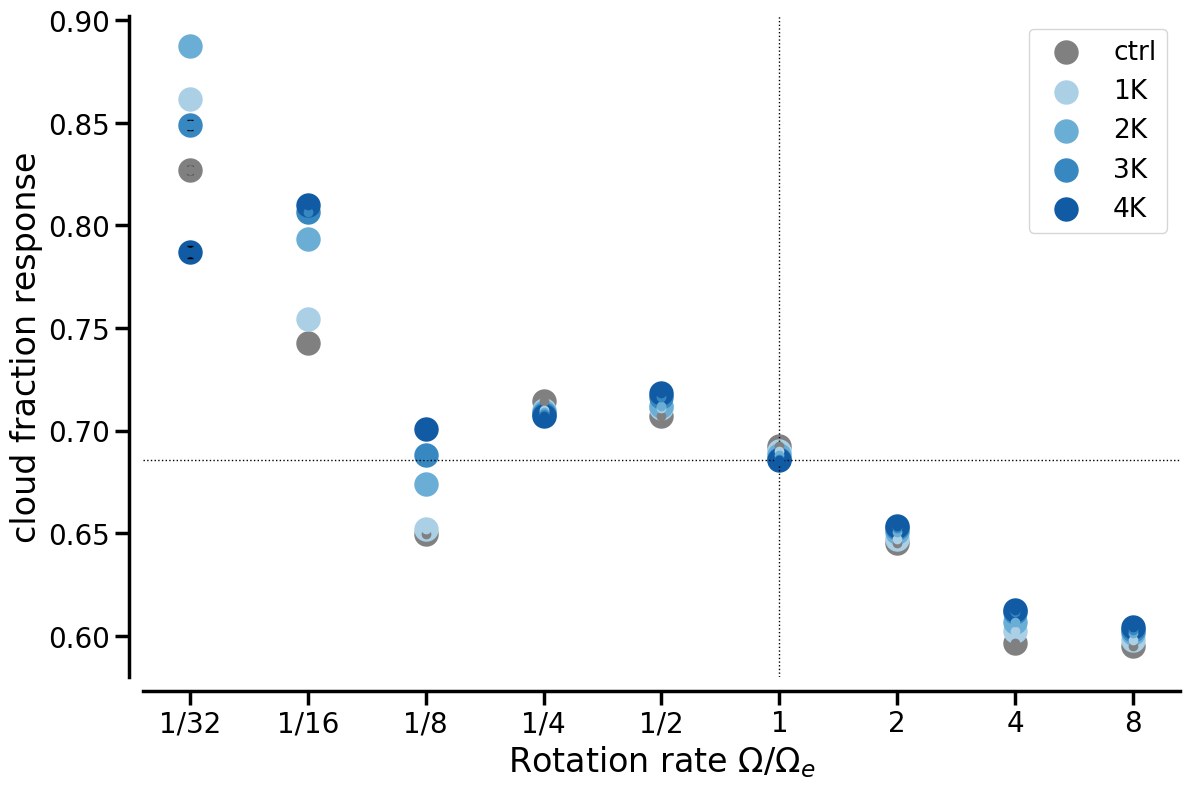

In [16]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'cloud fraction response'
y_lim = [-8, None]

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))


for key, var in cloud.items():
    y = var['cloud fraction']['mean']
    std = var['cloud fraction']['error']
    color = var['cloud fraction']['color']
    ax.scatter(x, y, color = color, label = key, 
            marker = 'o', s = 275)
    ax.errorbar(x, y , yerr = std, fmt = 'o', color = color, 
                        ecolor='black', elinewidth=2, capsize=2)
    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
#ax.set_ylim(y_lim[0],y_lim[1])


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'upper right')
plt.axhline(y=y[5], color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=5, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/cloud_response.pdf')

## Cloud water

In [17]:
colormap = plt.cm.Blues(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)

# Precompute control data arrays
#cloud_water_ctrl = bf.dict_to_xarray(data_2D['ctrl'], rotation, 'xlvi', time_slice)
#tsurf_ctrl = bf.dict_to_xarray(data_2D['ctrl'], rotation, 'tsurf', time_slice)

# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_2D.items()):
    
    if key == 'ctrl':
        color = 'grey'
    else:
        color = colormap[i+1]

    # Convert data to xarray
    cloud_water = bf.dict_to_xarray(data, rotation, 'xlvi', time_slice)
    #tsurf = bf.dict_to_xarray(data, rotation, 'tsurf', time_slice)

    # Compute the clear-sky longwave radiation response
    #cloud_water_response = fun.feedback_parameter(cloud_water_ctrl, cloud_water, 
    #                                         tsurf_ctrl, tsurf)
    
    cloud_water_response_mean = bf.global_mean_weighted(cloud_water)
    cloud_water_response_error = bf.global_std_error(cloud_water)

    # Store the response and associated color
    cloud[key]['cloud water'] = {'mean': cloud_water_response_mean, 
                                    'error': cloud_water_response_error,
                                     'color': color}
         

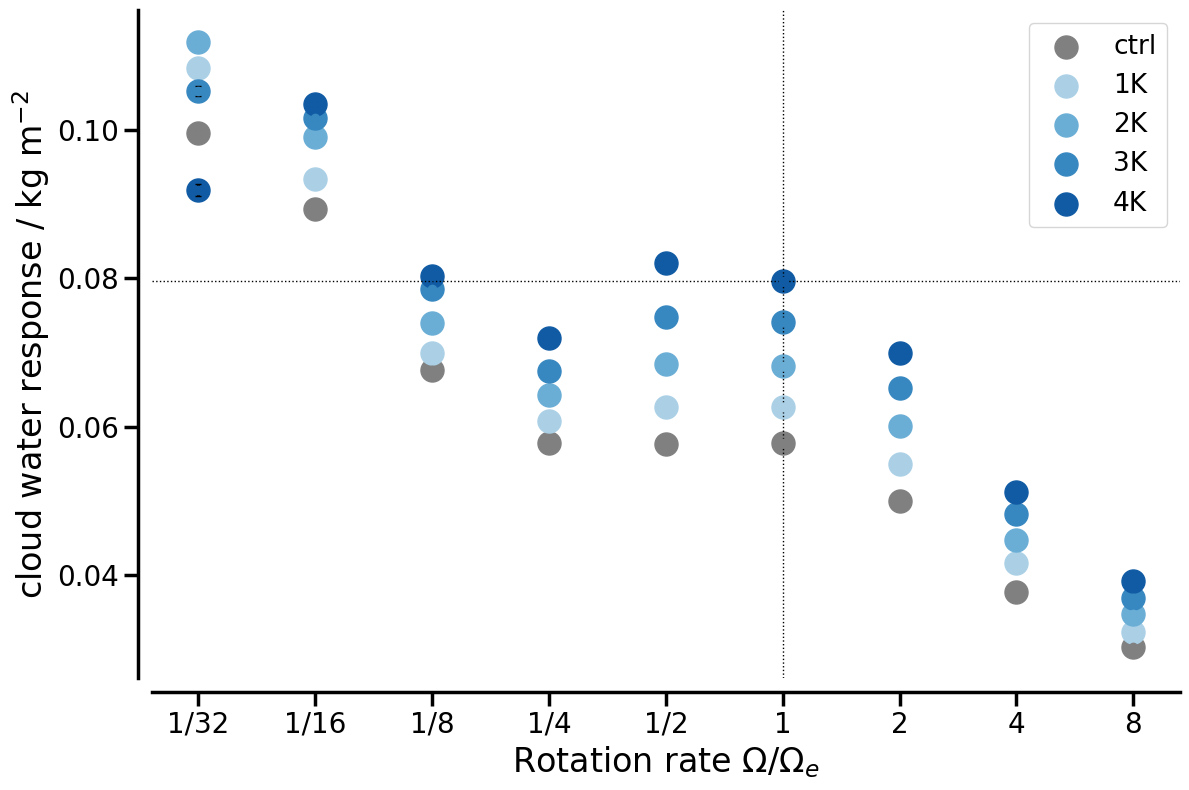

In [18]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'cloud water response / kg m$^{-2}$'
y_lim = [-8, None]

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation
ticks[5] = '1'
x = np.arange(0, len(ticks))


for key, var in cloud.items():
    y = var['cloud water']['mean']
    std = var['cloud water']['error']
    color = var['cloud water']['color']
    ax.scatter(x, y, color = color, label = key, 
            marker = 'o', s = 275)
    ax.errorbar(x, y , yerr = std, fmt = 'o', color = color, 
                        ecolor='black', elinewidth=2, capsize=2)
    
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
#ax.set_ylim(y_lim[0],y_lim[1])


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'upper right')
plt.axhline(y=y[5], color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=5, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/cloud_response.pdf')

# Responses in 3D variables

In [10]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['003125x', '00625x', '0125x', '025x', '05x', '1x', '2x', '4x', '8x']
#experiment = ['00625x', '1x', '4x']
output_dir = '/newdata/'
model = '_echam6'
file_type = ['_ATM', '_mastrfu', '_tdiag']
time = '_1976_2015'
suffix = '.nc'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

In [11]:
ctrl = {}
ctrl_sf = {}

rotation = ['1/32', '1/16', '1/8', '1/4', '1/2', 'Earth-like', '2', '4', '8']
#rotation = ['1/32', '1/16']
#rotation = [ '1/16', 'Earth-like', '4']

for i, rot in enumerate(rotation):
    ctrl[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )

    ctrl_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )

In [12]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_1K = {}
warm_1K_sf = {}

for i, rot in enumerate(rotation):
    warm_1K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )
    
    warm_1K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )


sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_2K = {}
warm_2K_sf= {}

for i, rot in enumerate(rotation):
    warm_2K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
    )
    
    warm_2K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
    )


sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_3K = {}
warm_3K_sf= {}

for i, rot in enumerate(rotation):
    warm_3K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
     )
    
    warm_3K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
     )

sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name0 = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

file_name1 = [
    f"{setup}{exp}{model}{file_type[1]}{time}{suffix}" for exp in experiment
]

warm_4K = {}
warm_4K_sf= {}

for i, rot in enumerate(rotation):
    warm_4K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name0[i],
        decode_times='true'
     )
    
    warm_4K_sf[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name1[i],
        decode_times='true'
     )

In [13]:
data_3D = {
    'ctrl': ctrl, 
    '1K': warm_1K,
    '2K': warm_2K,
    '3K': warm_3K,
    '4K': warm_4K
}

In [14]:
data_mastrfu = {
    'ctrl': ctrl_sf, 
    '1K': warm_1K_sf,
    '2K': warm_2K_sf,
    '3K': warm_3K_sf,
    '4K': warm_4K_sf
}

## Scatterplots

### cloud fraction profiles

In [47]:
import itertools as it

cm2 = plt.cm.Purples(np.linspace(0, 1, 6))[2:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

parameter_diff = {}
for key, variable in data_3D.items():
    
    # Cloud field (time mean)
    cloud_fraction = (
        bf.dict_to_xarray(variable, 'aclcac', ('rotation', rotation), time_slice)
        .mean(dim='time')
    )
    

    # Vertical velocity field 
    w = (
        bf.dict_to_xarray(variable, 'var135', ('rotation', rotation), time_slice)
        .mean(dim='time')
    )
    
    if key == 'ctrl':
        cloud_fraction_pre = cloud_fraction
        continue
    else:

        cloud_fraction_diff = cloud_fraction - cloud_fraction_pre

        # Total change
        cloud_fraction_change = bf.global_mean_weighted(cloud_fraction_diff)
        
        ## Cloud fraction change in subsidence region
        mask = bf.subsidence_mask(w)
        cloud_fraction_change_decent = bf.global_mean_weighted(cloud_fraction_diff.where(mask, drop=True))
        #low_cloud_subsidence = cloud_fraction_change_decent.sel(plev=slice(100000, 70000)).mean(dim='plev')
        cloud_fraction_pre = cloud_fraction

    color2 = color_map.get(key, next(color_cycle))

    parameter_diff.setdefault(key, {})['3D cloud'] = {
        'cloud fraction change': cloud_fraction_change,
        'cloud fraction change subsidence': cloud_fraction_change_decent,
        #'low_cloud_changes': low_cloud_subsidence,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

### 2D cloud fraction over subsidence region

In [17]:
def subsidence_mask(omega, plev=None, hadley=None):
    """
    Create a subsidence mask for the given omega dataset.

    Parameters:
    - omega: xarray DataArray containing the omega data.
    - plev: Pressure level to select from the omega data.
    - hadley: Latitude range for the Hadley cell to select.

    Returns:
    - A boolean mask where True indicates subsidence (omega > 0).
    """
    # Initialize an empty dictionary for selection criteria
    selection_criteria = {}

    # Add pressure level to selection criteria if specified
    if plev is not None:
        selection_criteria['plev'] = plev

    # Add latitude range to selection criteria if specified
    if hadley is not None:
        selection_criteria['lat'] = slice(hadley, -hadley)

    # Apply selection criteria to omega
    omega = omega.sel(**selection_criteria)
    
    # Return a boolean mask indicating subsidence
    return omega > 0

<xarray.DataArray ()>
array(0.6516527)
<xarray.DataArray ()>
array(0.65262942)
<xarray.DataArray ()>
array(0.67599039)


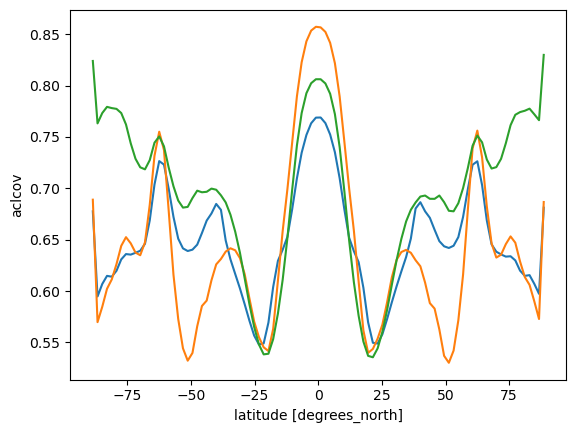

In [ ]:
omega = data_3D['ctrl']['1/8']['var135'].mean(dim=['time','plev'])
total_fraction = data_2D['ctrl']['1/8']['aclcov'].mean(dim=['time'])
print(bf.global_mean_weighted(total_fraction))
total_fraction.mean(dim=['lon']).plot()

omega = data_3D['1K']['1/8']['var135'].mean(dim=['time','plev'])
total_fraction = data_2D['1K']['1/8']['aclcov'].mean(dim=['time'])
print(bf.global_mean_weighted(total_fraction))
total_fraction.mean(dim=['lon']).plot()


omega = data_3D['2K']['1/8']['var135'].mean(dim=['time','plev'])
total_fraction = data_2D['2K']['1/8']['aclcov'].mean(dim=['time'])
print(bf.global_mean_weighted(total_fraction))
total_fraction.mean(dim=['lon']).plot()

omega = data_3D['2K']['1/8']['var135'].mean(dim=['time','plev'])
total_fraction = data_2D['2K']['1/8']['aclcov'].mean(dim=['time'])
print(bf.global_mean_weighted(total_fraction))
total_fraction.mean(dim=['lon']).plot()


In [25]:
import itertools as it

cm2 = plt.cm.Purples(np.linspace(0, 1, 6))[2:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

#parameter_diff = {}
for ((key, variable),(key_ATM, variable_ATM)) in zip(data_2D.items(),data_3D.items()):
    
    # Cloud field (time mean)
    total_cloud_fraction = (
        bf.dict_to_xarray(variable, 'aclcov', ('rotation', rotation), time_slice)
    ).mean('time')
    
    w = (
        bf.dict_to_xarray(variable_ATM, 'var135', ('rotation', rotation), time_slice)
    ).mean('time')
    
    if key == 'ctrl':
        total_cloud_fraction_pre = total_cloud_fraction
        continue
    else:

        total_cloud_fraction_diff = total_cloud_fraction - total_cloud_fraction_pre
        
        w_subsidence = subsidence_mask(w.mean('plev'))
        total_cloud_fraction_subsidence = total_cloud_fraction_diff.where(w_subsidence, drop=False)

        cloud_fraction_diff_mean = bf.global_mean_weighted(total_cloud_fraction_subsidence)
   
        total_cloud_fraction_pre = total_cloud_fraction

    color2 = color_map.get(key, next(color_cycle))

    parameter_diff.setdefault(key, {})['cloud 2D'] = {
        'cloud fraction change': cloud_fraction_diff_mean,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

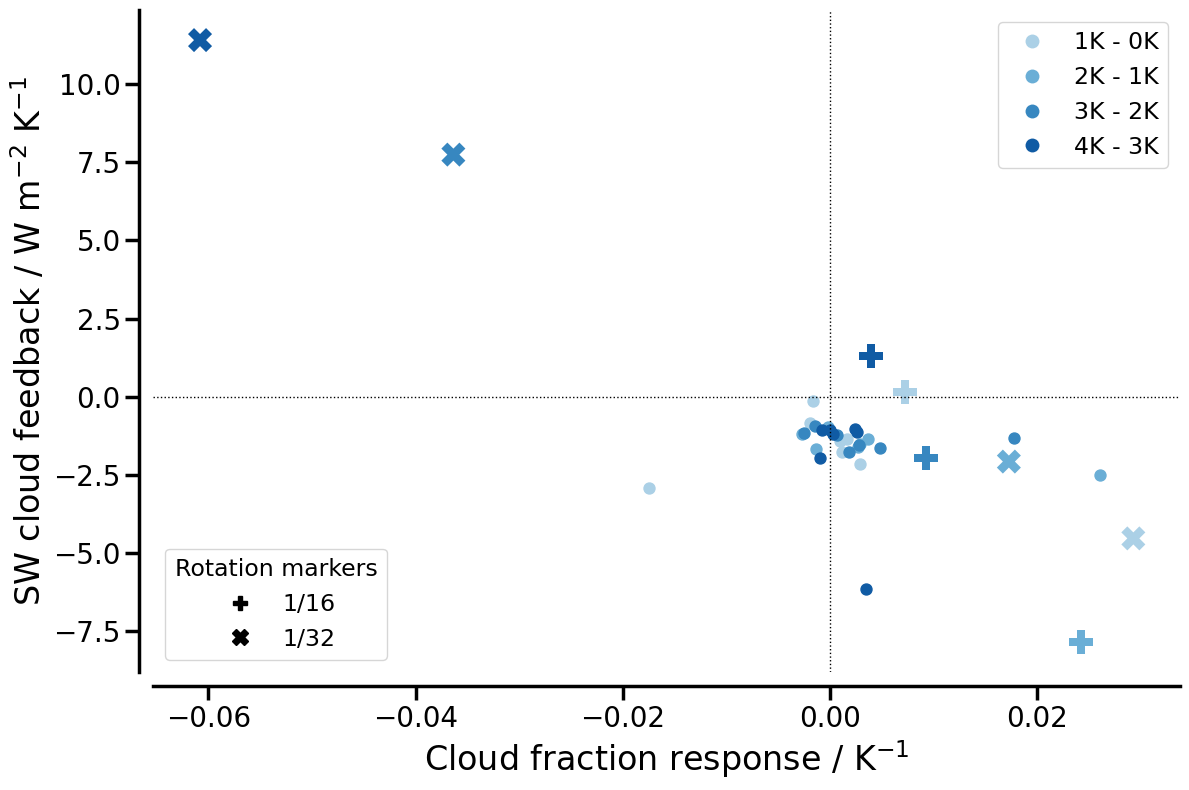

In [46]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

ylabel = 'SW cloud feedback / W m$^{-2}$ K$^{-1}$'
y_lim = [-8.5, 12.5]
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

# Rotations and markers
main_rots = ['1/8', '1/4', '1/2', 'Earth-like', '2', '4', '8']  # circles
special_markers = {'1/16': 'P', '1/32': 'X'}

fig, ax = plt.subplots(figsize=(12, 8))

# Ax styling
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
#ax.set_ylim(y_lim)  # uncomment if you want fixed limits

# Plot
series_handles = []
for i, ((key1, var1), (key2, var2)) in enumerate(zip(warm_response.items(), parameter_diff.items())):
    color = var1['sw cloud']['color']

    # Main rotations (circles)
    x_main = var2['cloud 2D']['cloud fraction change'].sel(rotation=main_rots)
    y_main = var1['sw cloud']['mean'].sel(rotation=main_rots)
    ax.scatter(x_main, y_main, color=color, marker='.', s=250, label=labels[i])

    # Special markers for 1/16 and 1/32
    for rot, marker in special_markers.items():
        x_sp = var2['cloud 2D']['cloud fraction change'].sel(rotation=rot)
        y_sp = var1['sw cloud']['mean'].sel(rotation=rot)
        ax.scatter(x_sp, y_sp, color=color, marker=marker, s=300, edgecolor='none')

    # Build a handle for the series legend (color only)
    series_handles.append(Line2D([0], [0], marker='o', linestyle='None',
                                 markerfacecolor=color, markeredgecolor='none',
                                 markersize=10, label=labels[i]))

# Labels
ax.set_xlabel('Cloud fraction response / K$^{-1}$', size=24)
ax.set_ylabel(ylabel, size=24)
plt.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')
plt.axvline(x=0, color='k', linewidth=1, linestyle = 'dotted')

# Legends
legend_series = ax.legend(handles=series_handles, fontsize=17,
                          title_fontsize=17, loc='upper right')

marker_handles = [
    Line2D([0], [0], marker='P', linestyle='None', color='k', label='1/16', markersize=10),
    Line2D([0], [0], marker='X', linestyle='None', color='k', label='1/32', markersize=12)
]
legend_markers = ax.legend(handles=marker_handles, fontsize=17, title='Rotation markers',
                           title_fontsize=17, loc='lower left')

ax.add_artist(legend_series)

plt.tight_layout()
plt.show()

### Lower tropospheric stability

In [43]:
import itertools as it

cm2 = plt.cm.copper_r(np.linspace(0, 1, 7))
color_map = {'ctrl': 'grey'}  # set ctrl to grey
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)


for ((key, variable),(key_bot, variable_bot)) in zip(data_3D.items(), data_2D.items()):
    
    w = (
        bf.dict_to_xarray(variable, 'var135', ('rotation', rotation), time_slice)
    ).mean('time')
    
    tpot = (
        bf.dict_to_xarray(variable, 'tpot', ('rotation', rotation), time_slice)
    ).mean('time')
    
    if key == 'ctrl':
        
        lts = tpot.sel(plev = 80000, method = 'nearest') - tpot.sel(plev = 100000, method = 'nearest')
        lts_pre = lts
        continue
    
    else:
        lts = tpot.sel(plev = 80000, method = 'nearest') - tpot.sel(plev = 100000, method = 'nearest')
        lts_diff = lts - lts_pre
        
        # Subsidence
        subsidence = bf.subsidence_mask(w.mean(dim=['plev']), plev=None)
        lts_diff = lts_diff.where(subsidence, drop=False)
        
        weights = np.cos(np.radians(lts_diff.lat))

        # Normalize weights so they sum to 1
        weights /= weights.sum()

        # Calculate the weighted average lts
        weighted_average_lts = ((lts * weights).sum(dim='lat')).mean(dim='lon')


    
        color2 = color_map.get(key, next(color_cycle))
    
        parameter_diff.setdefault(key, {})['lts'] = {
        'change': weighted_average_lts,
        'color': color2   
        }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

### Mass stream function

In [56]:
import itertools as it

cm2 = plt.cm.pink_r(np.linspace(0, 1, 7))
color_map = {'ctrl': 'grey'}  # set ctrl to grey
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

parameter = {}
for ((key, variable),(key_bot, variable_bot)) in zip(data_3D.items(), data_2D.items()):
    
    w = (
        bf.dict_to_xarray(variable, 'var135', ('rotation', rotation), time_slice)
    ).mean('time')
    
    total_cloud_fraction = (
        bf.dict_to_xarray(variable_bot, 'aclcov', ('rotation', rotation), time_slice)
    ).mean('time')
    
    # Subsidence
    subsidence = bf.subsidence_mask(w, plev=None)
    w_subsidence = w.where(subsidence, drop=True)
    w_subsidence = bf.global_mean_weighted(w_subsidence).sel(plev=slice(1.0090e+05,5.0000e+04)
                                                                 ).max(dim='plev')
    #
    w_2D = bf.subsidence_mask(w.mean('plev'))
    total_cloud_fraction_subsidence = total_cloud_fraction.where(w_2D, drop=False)

    low_cloud_fraction_mean = bf.global_mean_weighted(total_cloud_fraction_subsidence)
    
    color2 = color_map.get(key, next(color_cycle))
    
    parameter.setdefault(key, {})['subsidence'] = {
    'mean': w_subsidence,
    'color': color2   
    }
    
    parameter.setdefault(key, {})['cloud'] = {
    'mean': low_cloud_fraction_mean
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


KeyboardInterrupt: 

In [51]:
import itertools as it

cm2 = plt.cm.copper_r(np.linspace(0, 1, 7))
color_map = {'ctrl': 'grey'}  # set ctrl to grey
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)


for ((key, variable),(key_ATM, variable_ATM)) in zip(data_2D.items(),data_3D.items()):
    
    w = (
        bf.dict_to_xarray(variable_ATM, 'var135', ('rotation', rotation), time_slice)
    ).mean(dim=['time'])
    
    temp = (
        bf.dict_to_xarray(variable_ATM, 'st', ('rotation', rotation), time_slice)
    )
    
    temp_equator = temp.sel(lat=0, method='nearest').mean(dim=['time', 'lon'])
    pressure_level = cf.find_nearest_plev(temp_equator, 273)
    
    if key == 'ctrl':
        subsidence = bf.subsidence_mask(w, plev=None)
        w_subsidence = w.where(subsidence, drop=True)
        w_subsidence = bf.global_mean_weighted(w_subsidence)
        w_subsidence_pre = w_subsidence
        continue
    else:
        subsidence = bf.subsidence_mask(w, plev=None)
        w_subsidence = w.where(subsidence, drop=True)
        w_subsidence = bf.global_mean_weighted(w_subsidence)
        
        w_diff = (w_subsidence - w_subsidence_pre).sel(plev=slice(1.0090e+05,pressure_level[0])
                                                                 ).mean(dim='plev')
   
        w_subsidence_pre = w_subsidence

    color2 = color_map.get(key, next(color_cycle))

    parameter_diff.setdefault(key, {})['subsidence'] = {
        'change': w_diff,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

In [64]:
import itertools as it

cm2 = plt.cm.summer_r(np.linspace(0, 1, 6))[1:]
color_map = {'ctrl': 'grey'}  # set ctrl to grey
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)


for ((key, variable),(key_ATM, variable_ATM)) in zip(data_mastrfu.items(),data_3D.items()):
    
    mastrfu = (
        bf.dict_to_xarray(variable, 'mastrfu', ('rotation', rotation), time_slice)
    )
    
    if key == 'ctrl':
        congestus_mastrfu, deep_mastrfu = cf.shallow_deep_mastrfu(mastrfu)
        congestus_mastrfu_pre = congestus_mastrfu
        continue
    else:
        congestus_mastrfu, deep_mastrfu = cf.shallow_deep_mastrfu(mastrfu)
        congestus_diff = (congestus_mastrfu - congestus_mastrfu_pre)
        congestus_mastrfu_pre = congestus_mastrfu

    color2 = color_map.get(key, next(color_cycle))

    parameter_diff.setdefault(key, {})['mastrfu'] = {
        'change': congestus_diff,
        'color': color2
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

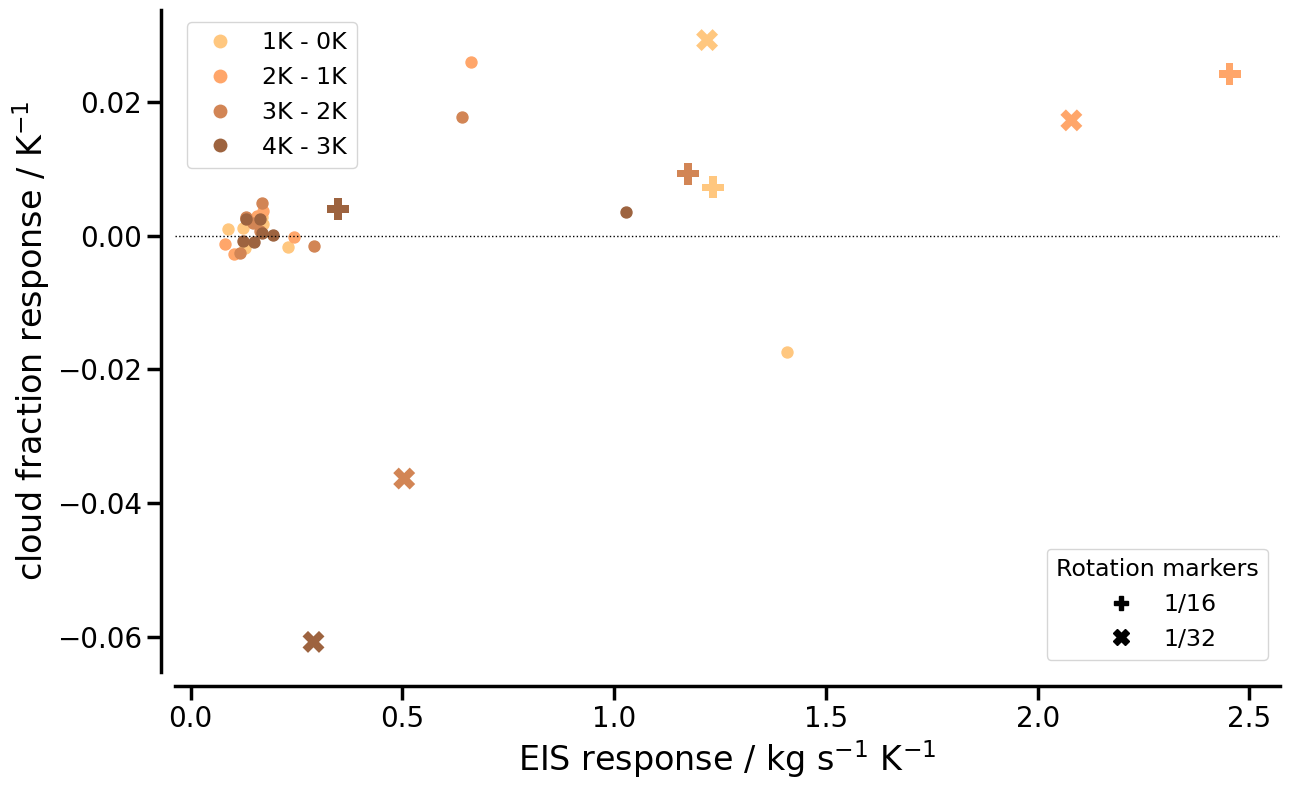

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

ylabel = 'cloud fraction response / K$^{-1}$' #'subsidence response / Pa s$^{-1}$ K$^{-1}$'
y_lim = [-8.5, 12.5]
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

# Rotations and markers
main_rots = ['1/8', '1/4', '1/2', 'Earth-like', '2', '4', '8']  # circles
special_markers = {'1/16': 'P', '1/32': 'X'}

fig, ax = plt.subplots(figsize=(13, 8))

# Ax styling
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
#ax.set_ylim(y_lim)  # uncomment if you want fixed limits

# Plot
series_handles = []
for i, (key2, var2) in enumerate(parameter_diff.items()):
    color = var2['eis']['color']

    # Main rotations (circles)
    x_main = var2['eis']['change'].sel(rotation=main_rots)
    y_main = var2['cloud 2D']['cloud fraction change'].sel(rotation=main_rots)
    ax.scatter(x_main, y_main, color=color, marker='.', s=250, label=labels[i])

    # Special markers for 1/16 and 1/32
    for rot, marker in special_markers.items():
        x_sp = var2['eis']['change'].sel(rotation=rot)
        y_sp = var2['cloud 2D']['cloud fraction change'].sel(rotation=rot)
        ax.scatter(x_sp, y_sp, color=color, marker=marker, s=250, edgecolor='none')

    # Build a handle for the series legend (color only)
    series_handles.append(Line2D([0], [0], marker='o', linestyle='None',
                                 markerfacecolor=color, markeredgecolor='none',
                                 markersize=10, label=labels[i]))

# Labels
ax.set_xlabel('EIS response / kg s$^{-1}$ K$^{-1}$', size=24)
ax.set_ylabel(ylabel, size=24)

#ax.xaxis.get_offset_text().set_visible(False)
#ax.annotate(r'$\times 10^{11}$', xy=(1, 0), xytext=(20, -30),
#            xycoords='axes fraction', textcoords='offset points',
 #           fontsize=20, ha='left', va='bottom')

# Legends
legend_series = ax.legend(handles=series_handles, fontsize=17,
                          title_fontsize=17, loc='upper left')

marker_handles = [
    Line2D([0], [0], marker='P', linestyle='None', color='k', label='1/16', markersize=10),
    Line2D([0], [0], marker='X', linestyle='None', color='k', label='1/32', markersize=12)
]
legend_markers = ax.legend(handles=marker_handles, fontsize=17, title='Rotation markers',
                           title_fontsize=17, loc='lower right')

plt.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')
#plt.axvline(x=0, color='k', linewidth=1, linestyle = 'dotted')

ax.add_artist(legend_series)

plt.tight_layout()
plt.show()

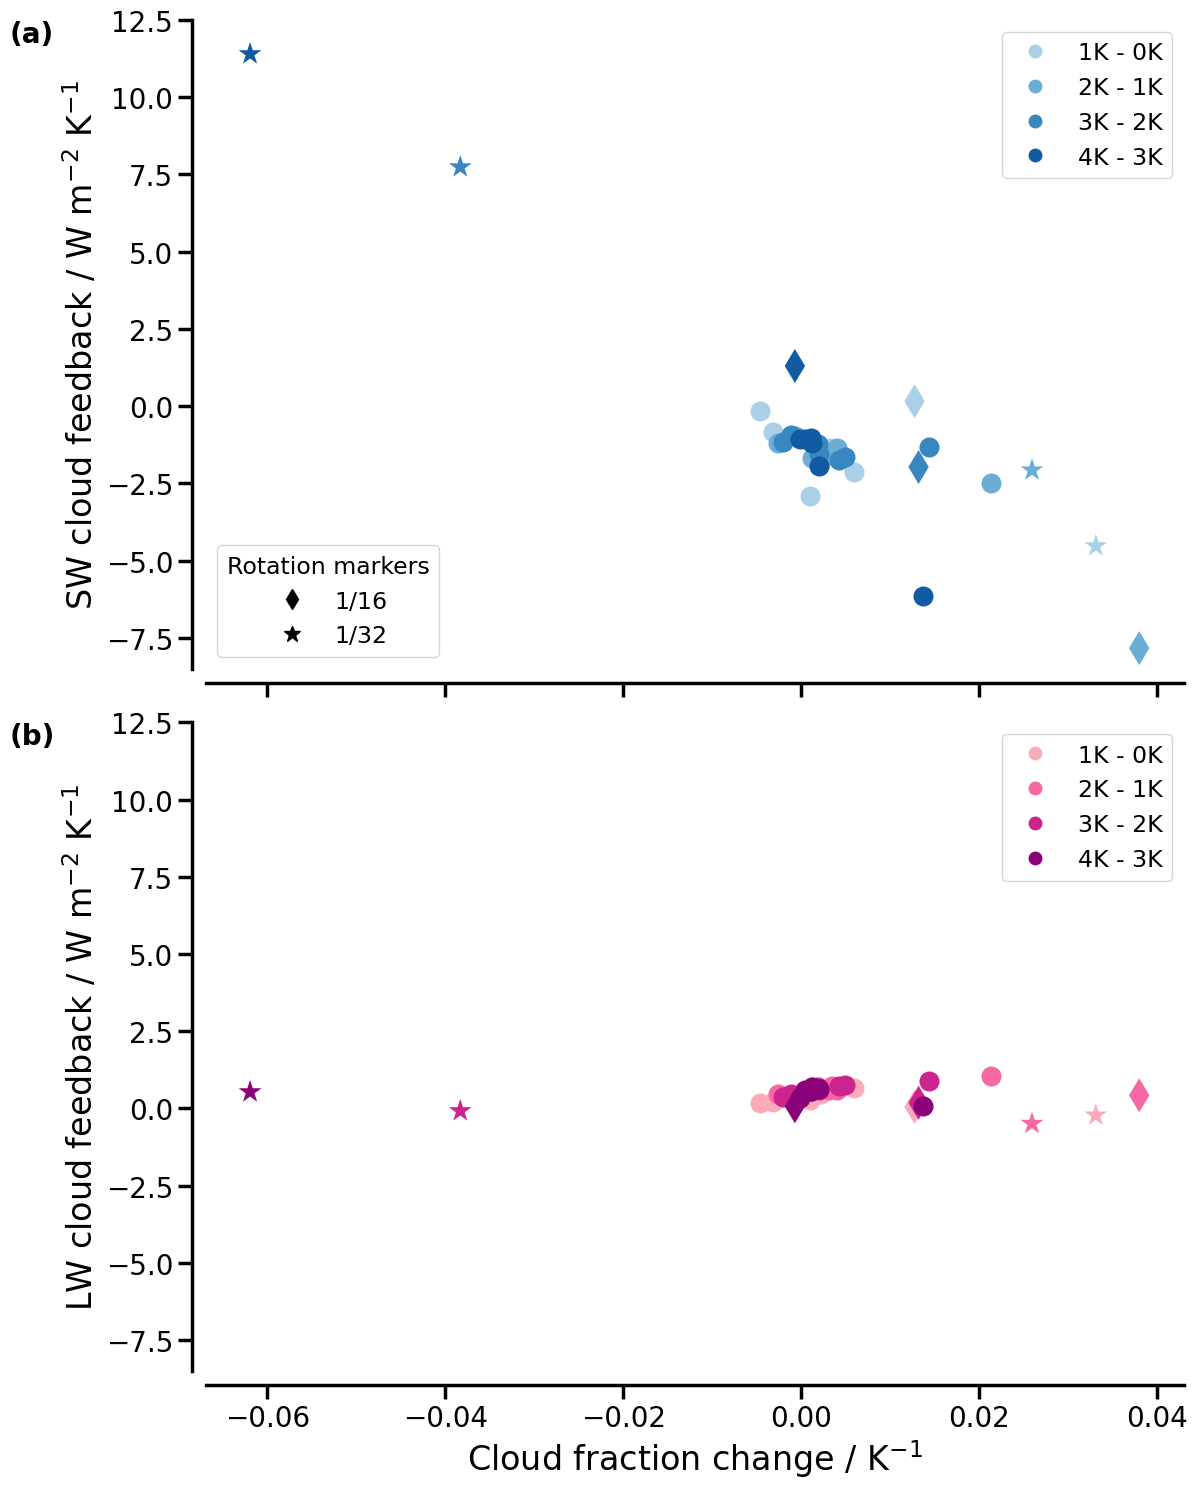

In [46]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Labels and limits
ylabel_sw = 'SW cloud feedback / W m$^{-2}$ K$^{-1}$'
ylabel_lw = 'LW cloud feedback / W m$^{-2}$ K$^{-1}$'
x_label = 'Cloud fraction change / K$^{-1}$'

# Set y-limits (adjust as needed)
y_lim_sw = [-8.5, 12.5]
y_lim_lw = [-8.5, 12.5]

labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

# Rotations and markers
main_rots = ['1/8', '1/4', '1/2', 'Earth-like', '2', '4', '8']  # circles
special_markers = {'1/16': 'd', '1/32': '*'}

# Figure and axes
fig, (ax_sw, ax_lw) = plt.subplots(nrows=2, sharex=True, figsize=(12, 15))

def style_axis(ax):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)

style_axis(ax_sw)
style_axis(ax_lw)

# Set y-limits
ax_sw.set_ylim(y_lim_sw)
ax_lw.set_ylim(y_lim_lw)

# Handles for legends
series_handles_sw = []
series_handles_lw = []

# Plot
series_handles = []
for i, ((key1, var1), (key2, var2)) in enumerate(zip(warm_response.items(), parameter_diff.items())):
    # Choose a consistent color per series
    color_lw = var1['lw cloud']['color']
    color_sw = var1['sw cloud']['color']

    # Main rotations (circles)
    x_main = var2['cloud 2D']['cloud fraction change'].sel(rotation=main_rots)
    y_sw_main = var1['sw cloud']['mean'].sel(rotation=main_rots)
    y_lw_main = var1['lw cloud']['mean'].sel(rotation=main_rots)
    ax_sw.scatter(x_main, y_sw_main, color=color_sw, marker='o', s=180, label=labels[i])
    ax_lw.scatter(x_main, y_lw_main, color=color_lw, marker='o', s=180, label=labels[i])

    # Special markers for 1/16 and 1/32
    for rot, marker in special_markers.items():
        x_sp = var2['cloud 2D']['cloud fraction change'].sel(rotation=rot)
        y_sp_sw = var1['sw cloud']['mean'].sel(rotation=rot)
        y_sp_lw = var1['lw cloud']['mean'].sel(rotation=rot)
        ax_sw.scatter(x_sp, y_sp_sw, color=color_sw, marker=marker, s=300, edgecolor='none')
        ax_lw.scatter(x_sp, y_sp_lw, color=color_lw, marker=marker, s=300, edgecolor='none')

    # Build panel-specific series legend handles
    series_handles_sw.append(Line2D([0], [0], marker='o', linestyle='None',
                                    markerfacecolor=color_sw, markeredgecolor='none',
                                    markersize=10, label=labels[i]))
    series_handles_lw.append(Line2D([0], [0], marker='o', linestyle='None',
                                    markerfacecolor=color_lw, markeredgecolor='none',
                                    markersize=10, label=labels[i]))

# Labels
ax_sw.set_ylabel(ylabel_sw, size=24)
ax_lw.set_ylabel(ylabel_lw, size=24)
ax_lw.set_xlabel(x_label, size=24)

# Panel labels
ax_sw.text(-0.2, 1, '(a)', transform=ax_sw.transAxes,
           fontsize=20, fontweight='bold', va='top', ha='left')
ax_lw.text(-0.2, 1, '(b)', transform=ax_lw.transAxes,
           fontsize=20, fontweight='bold', va='top', ha='left')

# Legends (put series legend on bottom panel, marker legend on top panel)
legend_series_sw = ax_sw.legend(handles=series_handles_sw, fontsize=17, loc='upper right')

marker_handles = [
    Line2D([0], [0], marker='d', linestyle='None', color='k', label='1/16', markersize=10),
    Line2D([0], [0], marker='*', linestyle='None', color='k', label='1/32', markersize=12)
]
llegend_markers = ax_sw.legend(handles=marker_handles, fontsize=17,
                              title='Rotation markers', title_fontsize=17,
                              loc='lower left')
ax_sw.add_artist(legend_series_sw)  # keep both legends on top panel

ax_lw.legend(handles=series_handles_lw, fontsize=17, loc='upper right')

plt.tight_layout()
plt.savefig('Figures/cloud_feedback.pdf')

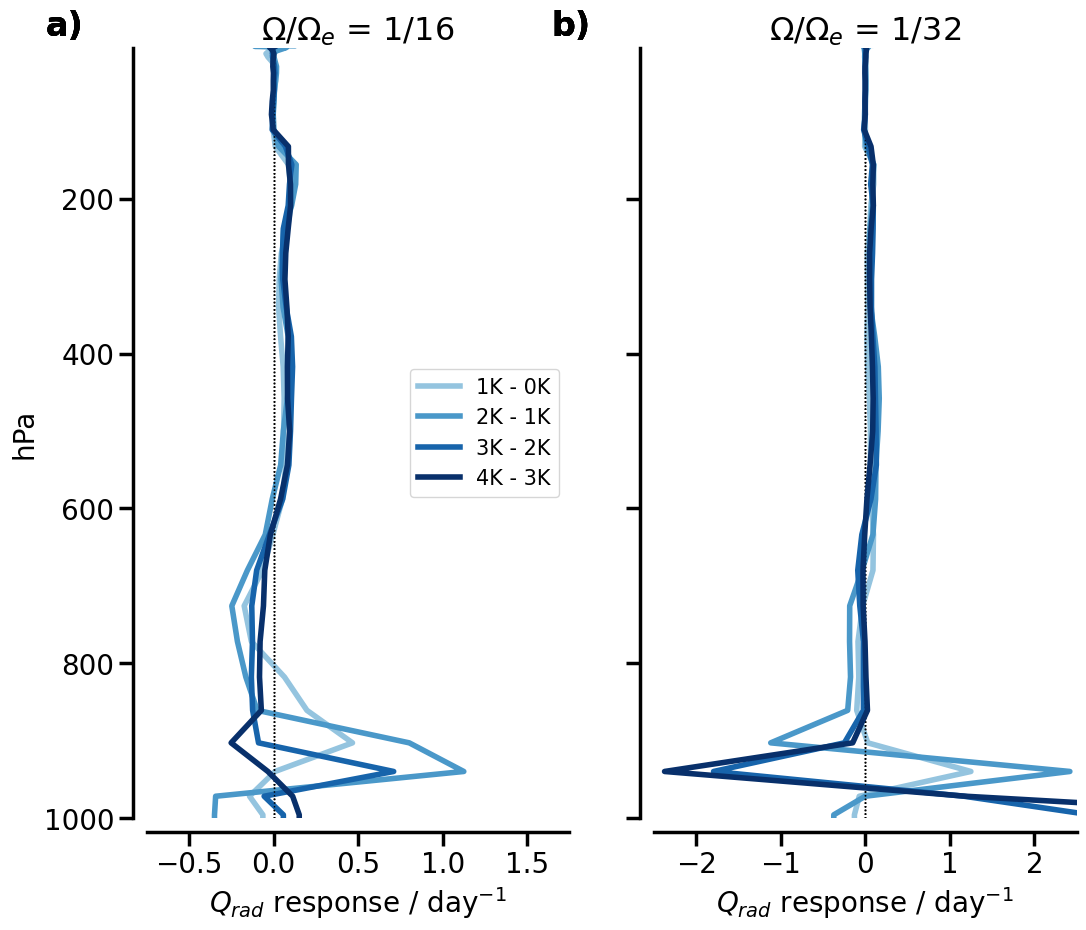

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10), sharey='row')
axes = axes.ravel()

# Function to configure axes
def configure_axes(ax, xlabel, ylabel=False, xlim=None, title=None):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.set_xlabel(xlabel, fontsize=20)
    ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
    ax.axvline(x=0, color='k', linewidth=1, linestyle = 'dotted')
    if  ylabel:
        #ax.invert_yaxis()
        ax.set_ylabel('hPa', size=20)
    if xlim:
        ax.set_xlim(xlim)
    if title:
        ax.set_title(title, size=23)

subplot_labels = ['a)', 'b)', 'c)']
labels = ['1K - 0K', '2K - 1K', '3K - 2K', '4K - 3K']

# Iterate over axes
for j,(key, var) in enumerate(radiation_diff.items()):
    for i, ax in enumerate(axes):
        
        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')
        
        if i == 0:
            var_name = var['radiative tendency']['subsidence region'].sel(rotation='1/16')
            color = var['radiative tendency']['color']
            xlabel = r'$Q_{rad}$ response / day$^{-1}$'
            xlim = [-0.75, 1.75]
            configure_axes(ax, xlabel,ylabel=True, xlim=xlim,title=r'$\Omega/\Omega_e$ = 1/16')
        elif i == 1:
            var_name = var['radiative tendency']['subsidence region'].sel(rotation='1/32')
            color = var['radiative tendency']['color']
            xlabel = r'$Q_{rad}$ response / day$^{-1}$'
            xlim = [-2.5, 2.5]
            configure_axes(ax, xlabel, xlim=xlim, title=r'$\Omega/\Omega_e$ = 1/32')
        
        ax.plot(var_name, var_name.plev / 100, color=color, label=labels[j], linewidth=4)
        
ax.invert_yaxis()
ax.set_ylim(1000,5)
# Add legends after plotting
axes[0].legend( title_fontsize=18, fontsize=15, loc='center right')

plt.show()
#plt.savefig('Figures/cloud.pdf')

### Compute total cloud fraction

In [ ]:
import itertools as it

cm2 = plt.cm.Purples(np.linspace(0, 1, 6))[2:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

parameter_diff = {}
for key, variable in data_3D.items():
    
    # Cloud field (time mean)
    cloud_fraction = (
        bf.dict_to_xarray(variable, 'aclcac', ('rotation', rotation), time_slice)
    )
    
    # Vertical velocity field 
    w = (
        bf.dict_to_xarray(variable, 'var135', ('rotation', rotation), time_slice)
        .mean(dim='time')
    )
        

        
    ## Cloud fraction change in subsidence region
    mask = bf.subsidence_mask(w)
    cloud_fraction_decent = cloud_fraction.where(mask, drop=True)
        
    ## Total cloud fraction computation
        
    total_cloud_fraction = rf.total_cloud_cover(cloud_fraction, 5.8800e+04, 1.0090e+05)
        
        
    color2 = color_map.get(key, next(color_cycle))

    parameter_diff.setdefault(key, {})['total cloud computation'] = {
        'low cloud fraction ': total_cloud_fraction,
        'color': color2
    }
        
        
    
    

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

In [110]:
import itertools as it

cm2 = plt.cm.Purples(np.linspace(0, 1, 6))[2:]
color_map = {'1': 'grey'}
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

low_cloud_changes = {}
for key, data in parameter_diff.items():
    
    low_clouds = data['total cloud computation']['low cloud fraction ']
    
    if key == 'ctrl':
        low_clouds_pre = low_clouds
        continue
    
    else:
        low_clouds_diff = low_clouds - low_clouds_pre
        
        low_clouds_diff_mean = bf.global_mean_weighted(low_clouds_diff.mean('time'))
        low_clouds_pre = low_clouds
        
        
    low_cloud_changes.setdefault(key, {})['total changes'] = {
        'value ': low_clouds_diff_mean,
        'color': color2
    }
        

## LTS, EIS, ECTEI

In [ ]:
def eis(st, q, rh, aps, tpot=None, pmin=70000, pmax=100000):
    """
    Calculate the Estimated Inversion Strength (EIS) from temperature data.

    Parameters:
    - temp: xarray DataArray containing the temperature data.
    - tpot: True if temp contains the potential temperature data.
    - plev1: Pressure level for the surface (default is 0 Pa).
    - plev2: Pressure level for the upper layer (default is 100000 Pa).

    Returns:
    - A DataArray representing the EIS.
    """
    # Calculate LTS
    lts_pmin = invf.lts(temp=st, tpot=tpot, plev1=pmin, plev2=pmax)
    #print(lts_pmin)

    # Calculate EIS using the formula EIS = LTS - Γ_m * (z_700 - z_inv)
    gamma_m = invf.moist_adiabat(st)  # Moist adiabatic lapse rate in K/mm
    pp = (pmin+pmax)/2  # Pressure in between pmin and pmax
    gamma_m = gamma_m.sel(plev=pp, method='nearest')  # Select the value at the desired pressure level

    z_pmin = invf.pressure_to_height(st,q, aps, pmin, st.plev)
    
    lcl_p, lcl_T = invf.compute_lcl(st.sel(plev=pmax), pmax, rh.sel(plev=pmax))
    z_lcl = invf.pressure_to_height(st, q, aps, lcl_p, st.plev)

    eis = lts_pmin - gamma_m * (z_pmin - z_lcl)

    return eis

In [26]:
time_slice = slice(19860131.996528,20151231.996528)

st = (
        bf.dict_to_xarray(data_3D['4K'], 'st', ('rotation', rotation), time_slice)
    ).mean('time')
    
#theta = (
#        bf.dict_to_xarray(data_3D['4K'], 'tpot', ('rotation', rotation), time_slice)
#    ).mean('time')

q = (
        bf.dict_to_xarray(data_3D['4K'], 'q', ('rotation', rotation), time_slice)
    ).mean('time')

rh = (
        bf.dict_to_xarray(data_3D['4K'], 'relhum', ('rotation', rotation), time_slice)
    ).mean('time')

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [27]:
aps = (
        bf.dict_to_xarray(data_2D['4K'], 'aps', ('rotation', rotation), time_slice)
    ).mean('time')

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [49]:
from metpy.calc import lcl as calculate_lcl, dewpoint_from_relative_humidity
from metpy.units import units

relhum  = rh.sel(plev=rh.plev.max()) * 100
stem  = st.sel(plev=st.plev.max())
Tdew = dewpoint_from_relative_humidity(stem * units.kelvin, relhum * units.percent)
lcl_p, lcl_T = calculate_lcl(aps * units.hPa, stem * units.kelvin, Tdew)

In [64]:


lcl_plev = xr.DataArray(
    lcl_p,
    dims=("rotation", "lat", "lon"),
    coords={
        "rotation": rotation,
        "lat": st.lat,
        "lon": st.lon
    },
    attrs={
        "long_name": "Lifted Condensation Level",
        "units": "Pa"
    }
)

lcl_T = xr.DataArray(
    lcl_T,
    dims=("rotation", "lat", "lon"),
    coords={
        "rotation": rotation,
        "lat": st.lat,
        "lon": st.lon
    },
    attrs={
        "long_name": " Temperature at Lifted Condensation Level",
        "units": "m"
    }
)



In [83]:
def pressure_to_height(T, q, ps, lcl_p, plev):
    """
    Compute LCL height using the hypsometric equation with
    vertical integration in log-pressure space.

    Parameters
    ----------
    T : xarray.DataArray
        Temperature (K) with dimension 'plev'
    q : xarray.DataArray
        Specific humidity (kg/kg)
    ps : xarray.DataArray
        Surface pressure (Pa)
    lcl_p : xarray.DataArray
        LCL pressure (Pa)
    plev : xarray.DataArray
        Pressure levels (Pa)

    Returns
    -------
    z : xarray.DataArray
        Height of LCL above surface (m)
    """

    Rd = 287.0
    g = 9.81

    # Virtual temperature
    Tv = T * (1 + 0.61 * q)

    # Broadcast pressure levels to match T dimensions
    p = plev.broadcast_like(T)

    # Create mask for integration bounds
    mask = (p <= ps) & (p >= lcl_p)

    # Compute d(ln p)
    dlnp = np.log(p.shift(plev=-1) / p)

    # Integrand
    integrand = Tv * dlnp

    # Apply mask
    integrand = integrand.where(mask)

    # Integrate vertically
    delta_z = -(Rd / g) * integrand.sum(dim="plev")

    return delta_z


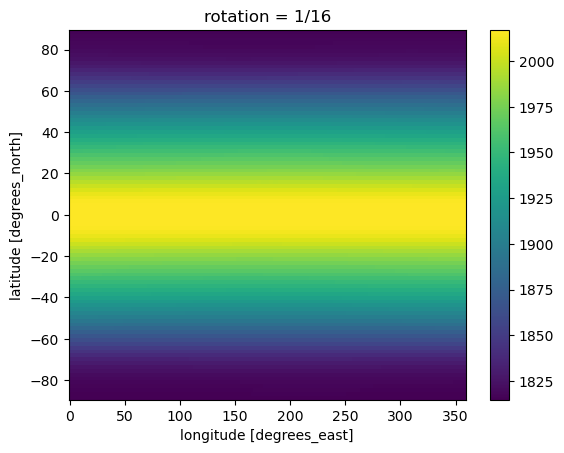

In [96]:
lcl_plev = lcl_plev.metpy.dequantify()
lcl_z = pressure_to_height(st, q, aps, lcl_plev, st.plev)
z_pmin = pressure_to_height(st,q, aps, 80000, st.plev)
z_pmin.sel(rotation='1/16').plot()

In [56]:
import itertools as it

cm2 = plt.cm.copper_r(np.linspace(0, 1, 7))
color_map = {'ctrl': 'grey'}  # set ctrl to grey
color_cycle = it.cycle(cm2)  # cycle safely over colors
time_slice = slice(19860131.996528,20151231.996528)

parameter_diff = {}

for ((key, variable),(key_bot, variable_bot)) in zip(data_3D.items(), data_2D.items()):
    
    w = (
        bf.dict_to_xarray(variable, 'var135', ('rotation', rotation), time_slice)
    ).mean('time')
    
    theta = (
        bf.dict_to_xarray(variable, 'tpot', ('rotation', rotation), time_slice)
    ).mean('time')
    
    st = (
        bf.dict_to_xarray(variable, 'st', ('rotation', rotation), time_slice)
    ).mean('time')
    
    q = (
        bf.dict_to_xarray(variable, 'q', ('rotation', rotation), time_slice)
    ).mean('time')
    
    rh = (
        bf.dict_to_xarray(variable, 'relhum', ('rotation', rotation), time_slice)
    ).mean('time')
    
    if key == 'ctrl':
        inv = eis(st, q, rh, tpot= theta, pmin=80000, pmax=st.plev.max())
        inv_pre = inv
        continue
    
    else:
        inv = eis(st, q, rh, tpot= theta, pmin=80000, pmax=st.plev.max())
        inv_diff = inv - inv_pre
        
        
        # Subsidence
        subsidence = bf.subsidence_mask(w.mean(dim=['plev']), plev=None)
        inv_subsidence = inv_diff.where(subsidence, drop=False)

        inv_subsidence = bf.global_mean_weighted(inv_subsidence)
   
        inv_pre = inv
        color2 = color_map.get(key, next(color_cycle))
    
        parameter_diff.setdefault(key, {})['eis'] = {
        'change': inv_subsidence,
        'color': color2   
        }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


KeyboardInterrupt: 

### Tests

## RH changes

In [16]:


time_slice = slice(19860131.996528,20151231.996528)


parameter_diff = {}

# Baseline (ctrl)
ctrl_rel_hum = bf.dict_to_xarray(data_3D['ctrl'], 'relhum', ('rotation', rotation), time_slice)
parameter_diff['ctrl'] = {
    'relative humidity': {'mean': ctrl_rel_hum.mean(dim=['time', 'lon']) * 100}
}

for key, variable in data_3D.items():
    
    # Cloud field (time mean)
    rel_hum = (
        bf.dict_to_xarray(variable, 'relhum', ('rotation', rotation), time_slice)
    )
    
    
    if key == 'ctrl':
        rel_hum_pre = rel_hum
        continue
    else:

        rel_hum_diff = rel_hum - rel_hum_pre
        

        # Total change
        rel_hum_diff = rel_hum_diff.mean(dim=['time','lon']) * 100
        
        rel_hum_pre = rel_hum


    parameter_diff.setdefault(key, {})['relative humidity'] = {
        'change': rel_hum_diff,
    }

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spa

/tmp/ipykernel_2325429/2009670022.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


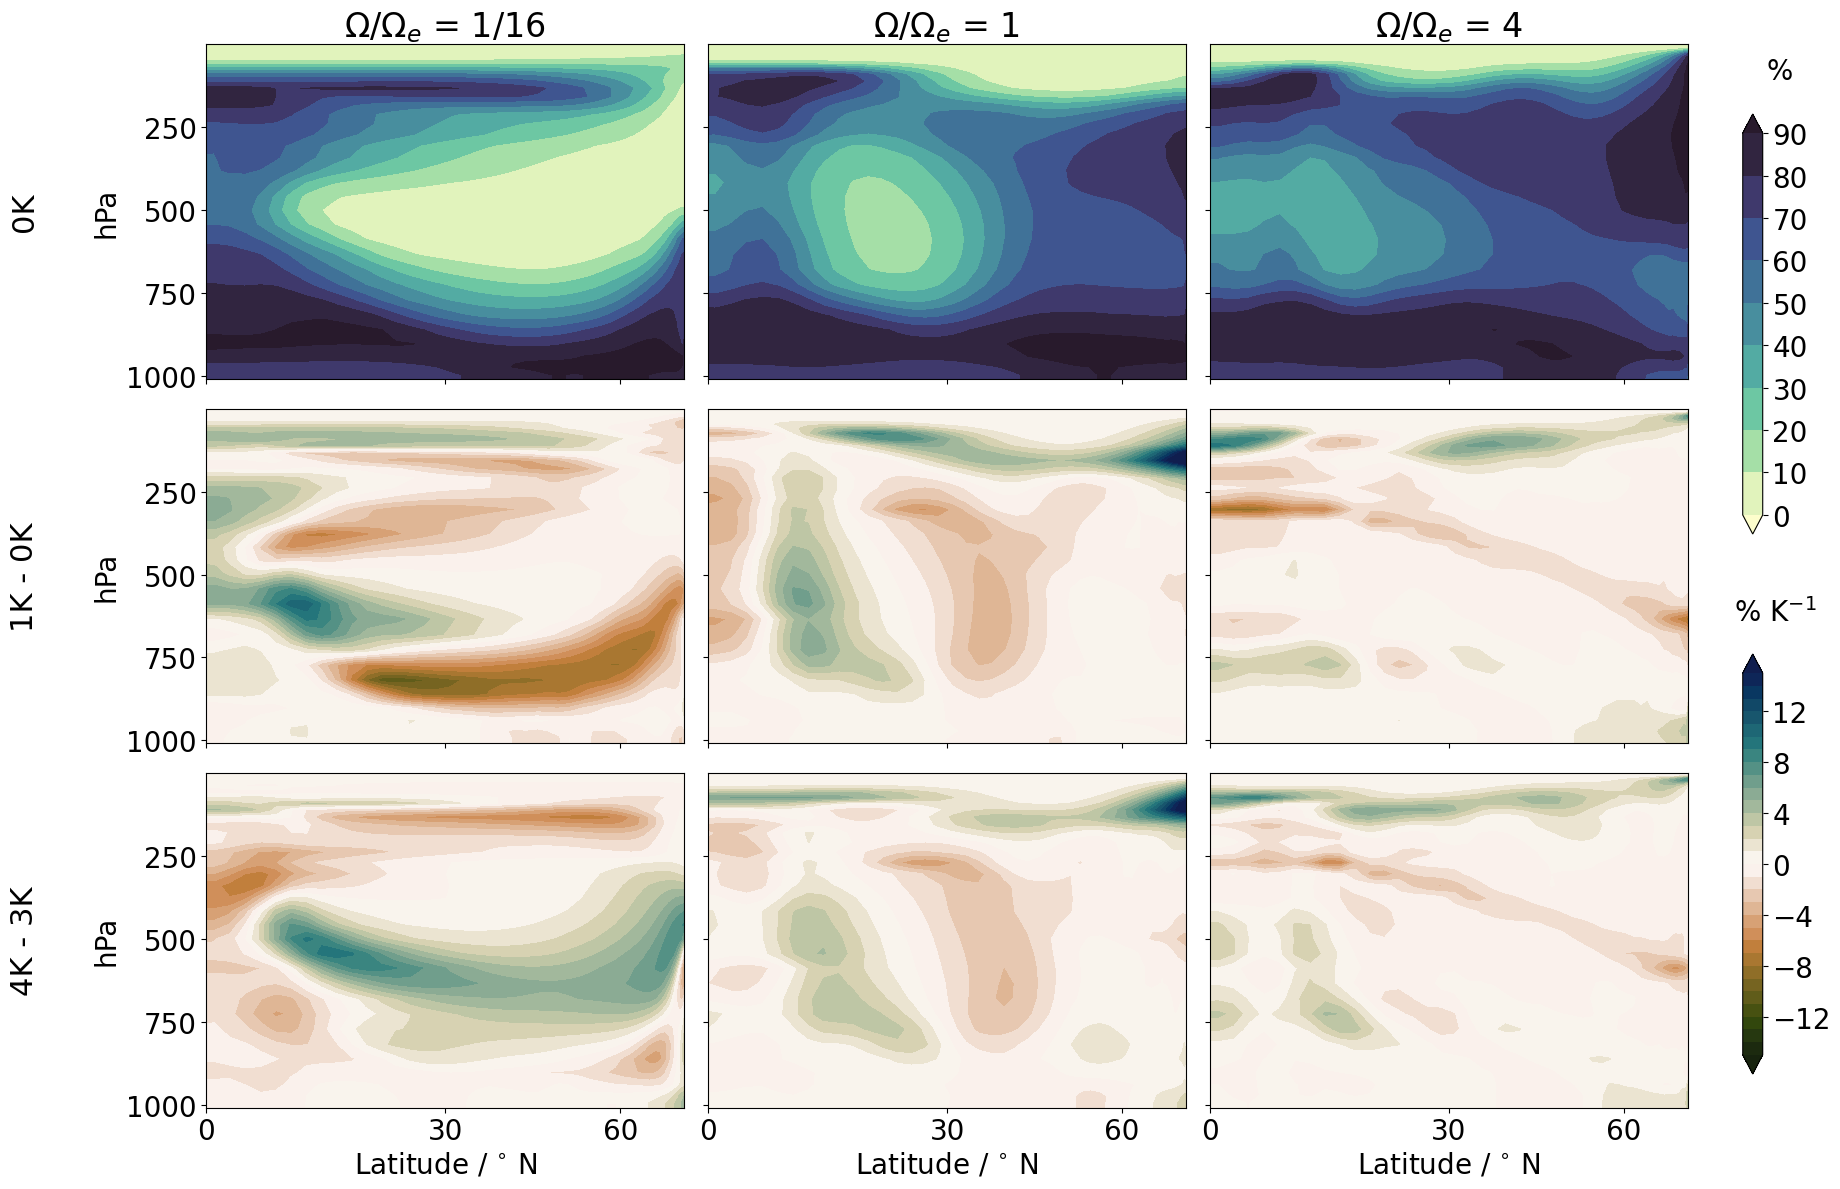

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Constants
cmap = cmocean.cm.tarn
ticks_deg = np.array([-60, -30, 0, 30, 60])
ticks = np.sin(np.deg2rad(ticks_deg))
y_ticks = np.array([1000, 750, 500, 250])
levels = np.arange(-15, 15.5, 1)
titles = [r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1', r'$\Omega/\Omega_e$ = 4']
keys = ['ctrl', '1K', '4K']
label_text = ['0K', '1K - 0K', '4K - 3K']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12), sharex='col', sharey='row')
axis = axes.ravel()

cmap2 = cmocean.cm.deep
levels2 = np.arange(0, 100, 10)


def plot_data(ax, z, cmap, levels, title=None, set_ylabel=False, set_xlabel=False):
    x = np.sin(np.deg2rad(z.lat))
    y = z.plev / 100
    x, y = np.meshgrid(x, y)
    cont = ax.contourf(x, y, z, cmap=cmap, levels=levels, extend='both')
    
    if set_ylabel:
        ax.set_ylabel('hPa', size=20)
        ax.invert_yaxis()
        ax.yaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_ticks(y_ticks)
        ax.set_yticklabels(y_ticks)
    
    if title:
        ax.set_title(title, size=24)
    
    if set_xlabel:
        ax.xaxis.set_tick_params(labelsize=20)
        ax.xaxis.set_ticks(ticks)
        ax.set_xticklabels(ticks_deg)
        ax.set_xlim(0, np.sin(np.deg2rad(z.lat[0])))
        ax.set_xlabel('Latitude / $^{\circ}$ N', size=20)
    
    return cont

# Plot each subplot
c = 0
mean_cont = None
for i, ax in enumerate(axis):
    if i % 3 == 0:
        z = parameter_diff[keys[c]]['relative humidity']['mean' if i < 3 else 'change'].sel(rotation='1/16')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[0] if i < 3 else None, set_ylabel=True)
        if i < 3:
            mean_cont = cont
    elif i % 3 == 1:
        z = parameter_diff[keys[c]]['relative humidity']['mean' if i < 3 else 'change'].sel(rotation='Earth-like')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[1] if i < 3 else None)
        if i < 3:
            mean_cont = cont
    else:
        z = parameter_diff[keys[c]]['relative humidity']['mean' if i < 3 else 'change'].sel(rotation='4')
        cont = plot_data(ax, z, cmap2 if i < 3 else cmap, levels2 if i < 3 else levels, title=titles[2] if i < 3 else None)
        if i < 3:
            mean_cont = cont
        c += 1
    
    if i >= 6:
        plot_data(ax, z, cmap, levels, set_xlabel=True)

# Add labels to the left side of each row
for i, ax in enumerate(axes[:, 0]):  # Iterate over the first column of axes
    ax.text(-0.35, 0.5, label_text[i], transform=ax.transAxes, fontsize=22, va='center', ha='right', rotation=90)

cbar_mean = fig.add_axes([0.87, 0.55, 0.01, 0.35])  # [left, bottom, width, height]
cbar1 = fig.colorbar(mean_cont, cax=cbar_mean, shrink=0.7, pad=0.04, aspect=30)
cbar_mean.tick_params(labelsize=20)
cbar1.set_label('%', rotation=0, fontsize=20, labelpad=-20, y=1.2)

cbar_change = fig.add_axes([0.87, 0.1, 0.01, 0.35])
cbar2 = fig.colorbar(cont, cax=cbar_change, shrink=0.5, pad=0.04, aspect=30)
cbar_change.tick_params(labelsize=20)
cbar2.set_label('% K$^{-1}$', rotation=0, fontsize=20, labelpad=-40, y=1.2)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig('Figures/relative_humidity.pdf')

## CRH histogram

In [ ]:
cm = plt.cm.OrRd(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)
color_map = {'ctrl': 'grey'}

rh = {}

# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_3D.items()):

    # Convert data to xarray
    q = bf.dict_to_xarray(data, 'q', ('rotation',rotation), time_slice)
    T = bf.dict_to_xarray(data, 'st', ('rotation',rotation), time_slice)

    r_col = rf.column_relative_humidity(q, T, slice(100000, 10000))

    pdf_rcol = rf.pdf(r_col.mean(dim=['time']))
    r_col_mean = r_col.mean(dim=['time','lon'])

    if key not in rh:
        rh[key] = {} 

    color = color_map.get(key, cm[i+1])

    # Store the response and associated color
    rh[key]['crh'] = {'mean': r_col_mean,
                      'pdf': pdf_rcol,
                      'color': color}

/tmp/ipykernel_2049762/850569667.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks_deg)


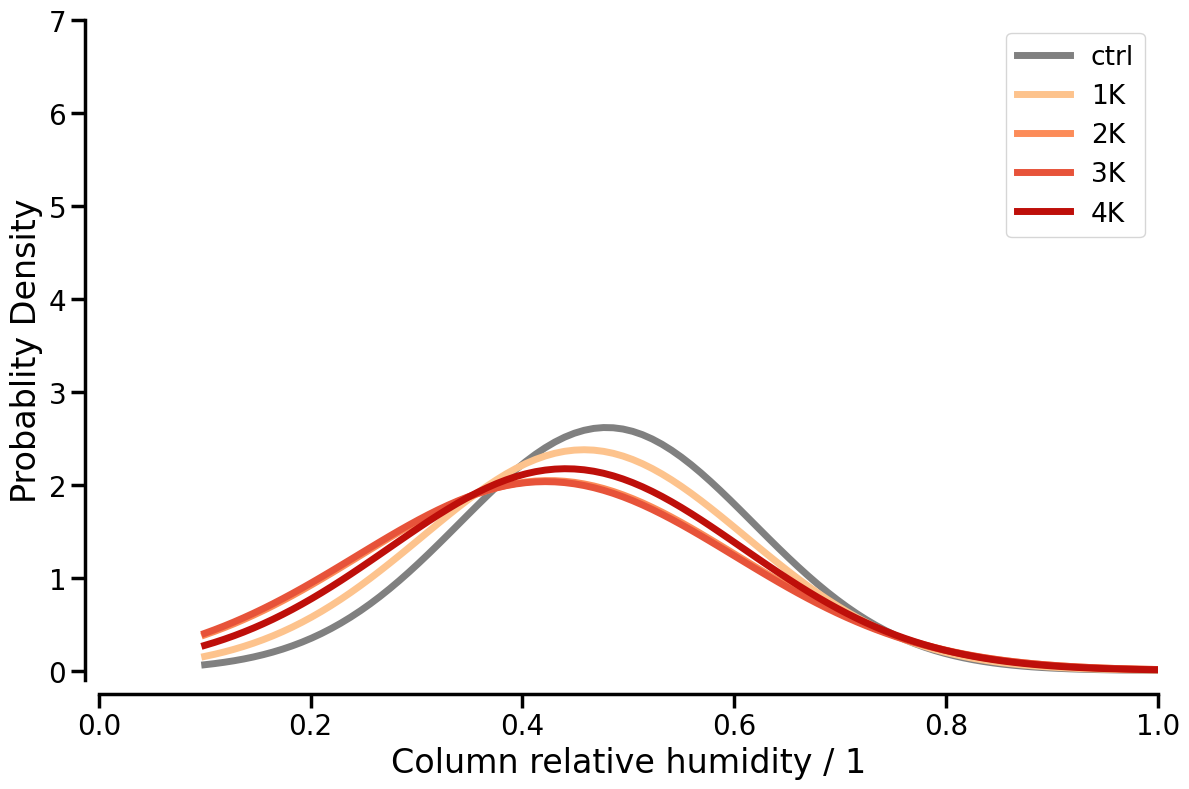

In [29]:
from matplotlib.ticker import ScalarFormatter
y_lim = [-3.5,-1]

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))



for key, var in rh.items():
     y = var['crh']['pdf'].sel(rotation='1/16')
     color = var['crh']['color']

     x = var['crh']['pdf']['crh']
     x = np.sin(np.deg2rad(var['crh']['mean'].sel(rotation='4').lat))
     x = np.linspace(0.1, 1, 99)

     ax.plot(x, y, color=color, linewidth=5, linestyle='solid', 
            label=key)


y_lim = [-0.1, 7]
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
plt.legend(fontsize=19)
#ticks_deg = np.array([-90, -60, -40, -20, 0, 20, 40, 60, 90])
ticks_deg = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
#ax.set_xticks(np.sin(np.deg2rad(ticks_deg)))
ax.set_xticklabels(ticks_deg)
ax.set_xlabel('Column relative humidity / 1', size=24)
ax.set_ylabel('Probablity Density', size=24)
ax.set_xlim(0, np.sin(np.deg2rad(90)))
ax.set_ylim(y_lim[0], y_lim[1])


#plt.xlabel('Latitude /'r'$^\circ$N', size=24)
plt.tight_layout()
plt.savefig('Figures/histogram_fast.pdf')

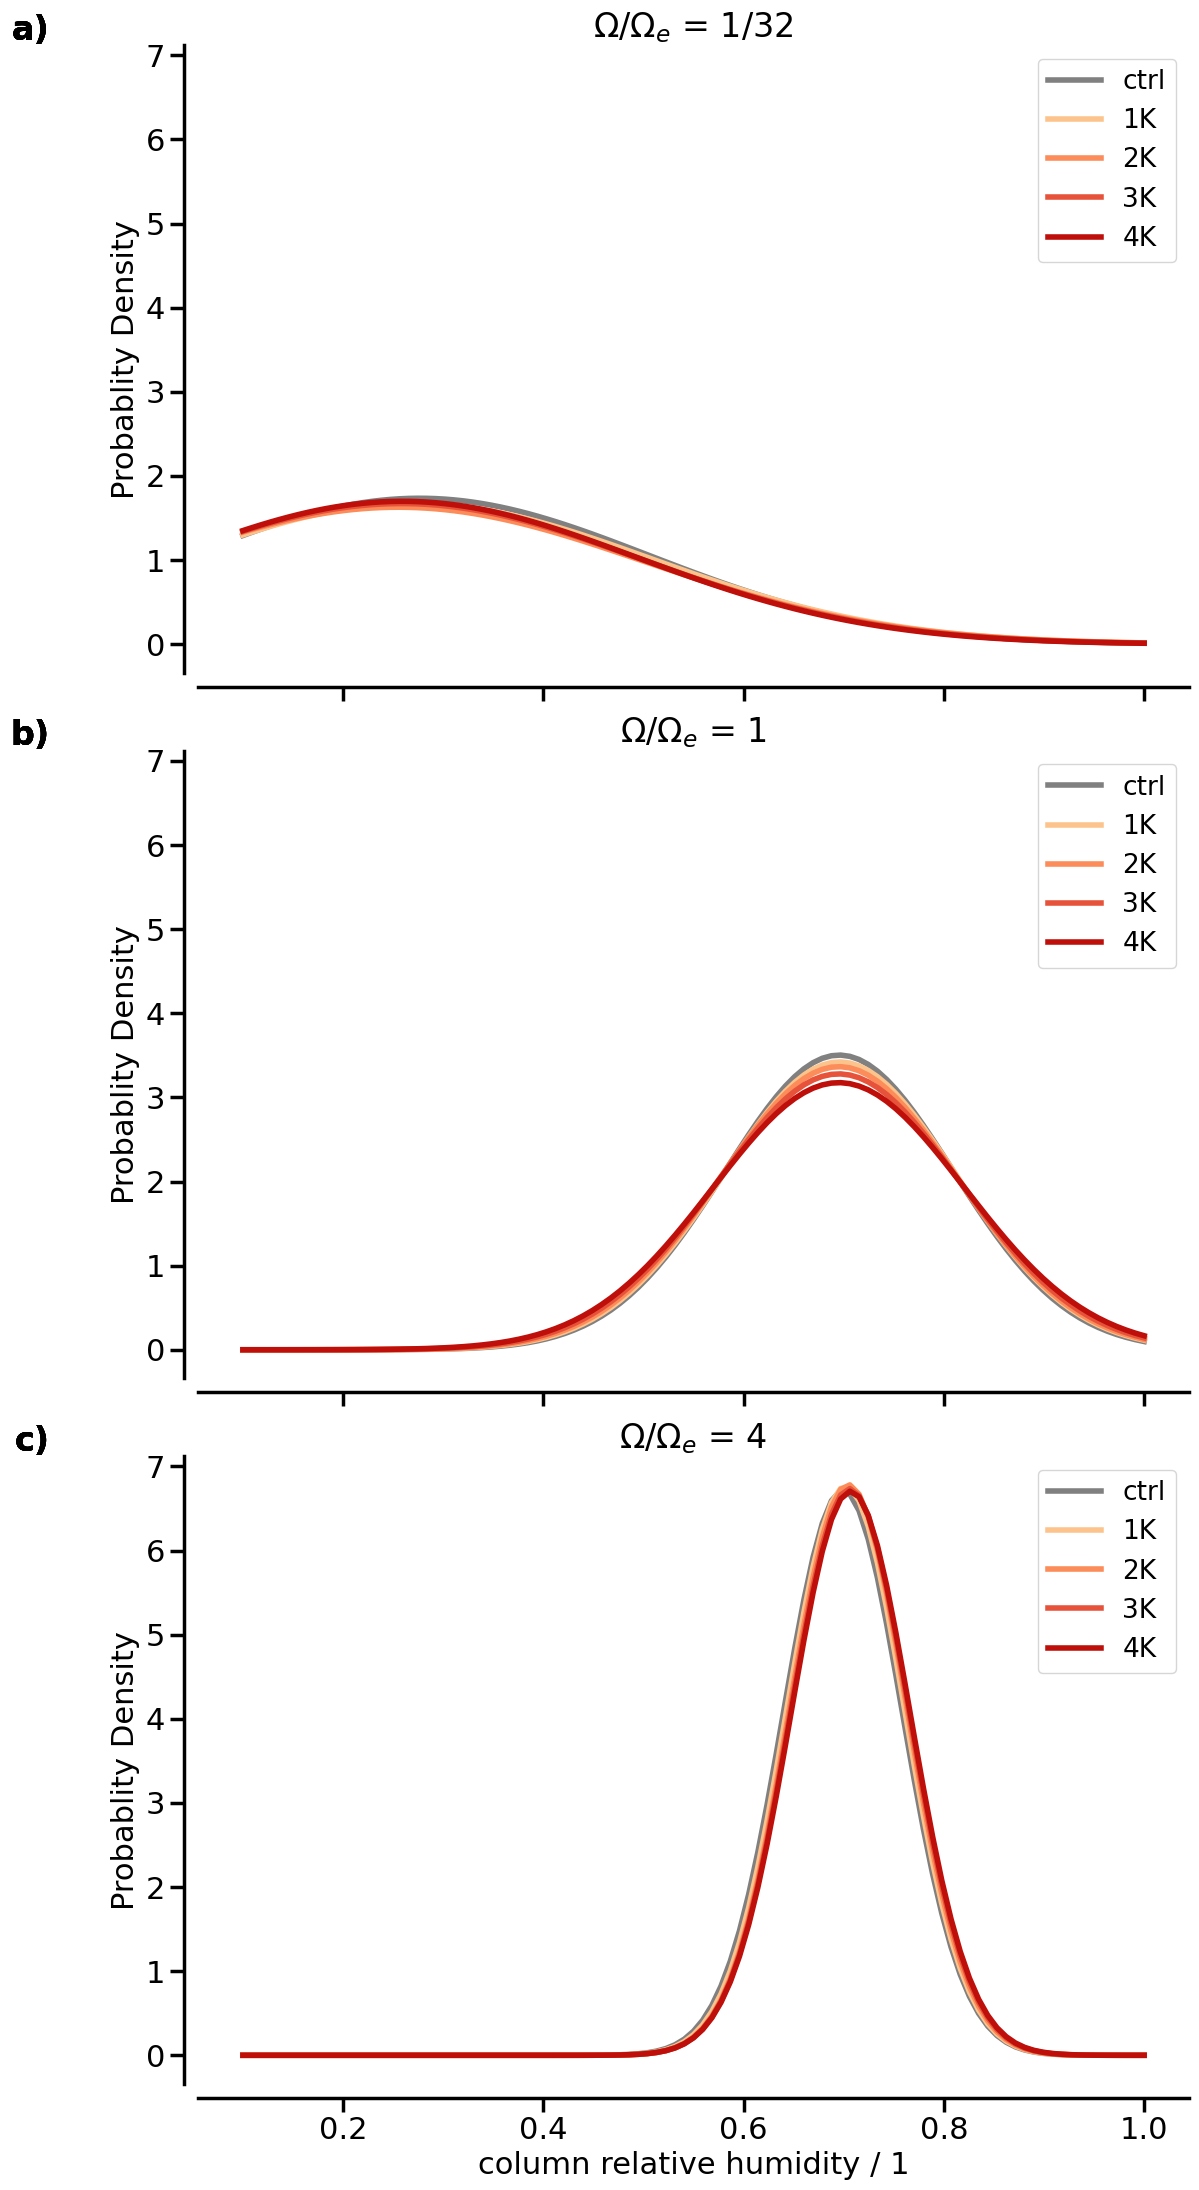

In [18]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 22), sharex=True, sharey='col')
axes = axes.ravel()

def configure_axes(ax, ylabel, ylim=None, title=None, xlabel=False, set_ticks=False):
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    ax.xaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=22, width=2.5, length=10)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=22)
    if xlabel:
        ax.set_xlabel('column relative humidity / 1', size=22)
    #if ylim:
        #ax.set_ylim(ylim)

# Iterate over axes

x = np.linspace(0.1, 1, 99)
subplot_labels = ['a)', 'b)', 'c)']


for key, var in rh.items():
    for i, ax in enumerate(axes):

        ax.text(-0.15, 1.05, subplot_labels[i], transform=ax.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')

    
        if i == 0:
            var_name = var['crh']['pdf'].sel(rotation='1/32')
            color = var['crh']['color']
            y_lim = None#[-0.1, 7]
            ylabel = 'Probablity Density'
            configure_axes(ax, ylabel, ylim=y_lim, title=r'$\Omega/\Omega_e$ = 1/32')
        elif i == 1:
            var_name = var['crh']['pdf'].sel(rotation='Earth-like')
            color = var['crh']['color']
            y_lim = None#[-0.1, 7]
            ylabel = 'Probablity Density'
            configure_axes(ax, ylabel, ylim=y_lim, title=r'$\Omega/\Omega_e$ = 1')
        elif i == 2:
            var_name = var['crh']['pdf'].sel(rotation='4')
            color = var['crh']['color']
            y_lim = None#[-0.1, 7]
            ylabel = 'Probablity Density'
            configure_axes(ax, ylabel, ylim=y_lim, title=r'$\Omega/\Omega_e$ = 4',xlabel=True)

        ax.plot(x, var_name, color=color, linewidth=4, linestyle='solid', 
            label=key)

        ax.legend(fontsize=19, loc='upper right')

plt.tight_layout()
plt.savefig('Figures/crh_histogram.pdf')

## Mass stream function

In [18]:
time_slice = slice(19860131.996528,20151231.996528)
z1 = bf.dict_to_xarray(data_mastrfu['ctrl'], 'mastrfu', 
                       ('rotation',rotation), time_slice)
z1 = z1.mean(dim=['time','lon'])
z2 = bf.dict_to_xarray(data_mastrfu['4K'], 'mastrfu', 
                       ('rotation',rotation), time_slice)
z2 = z2.mean(dim=['time','lon'])

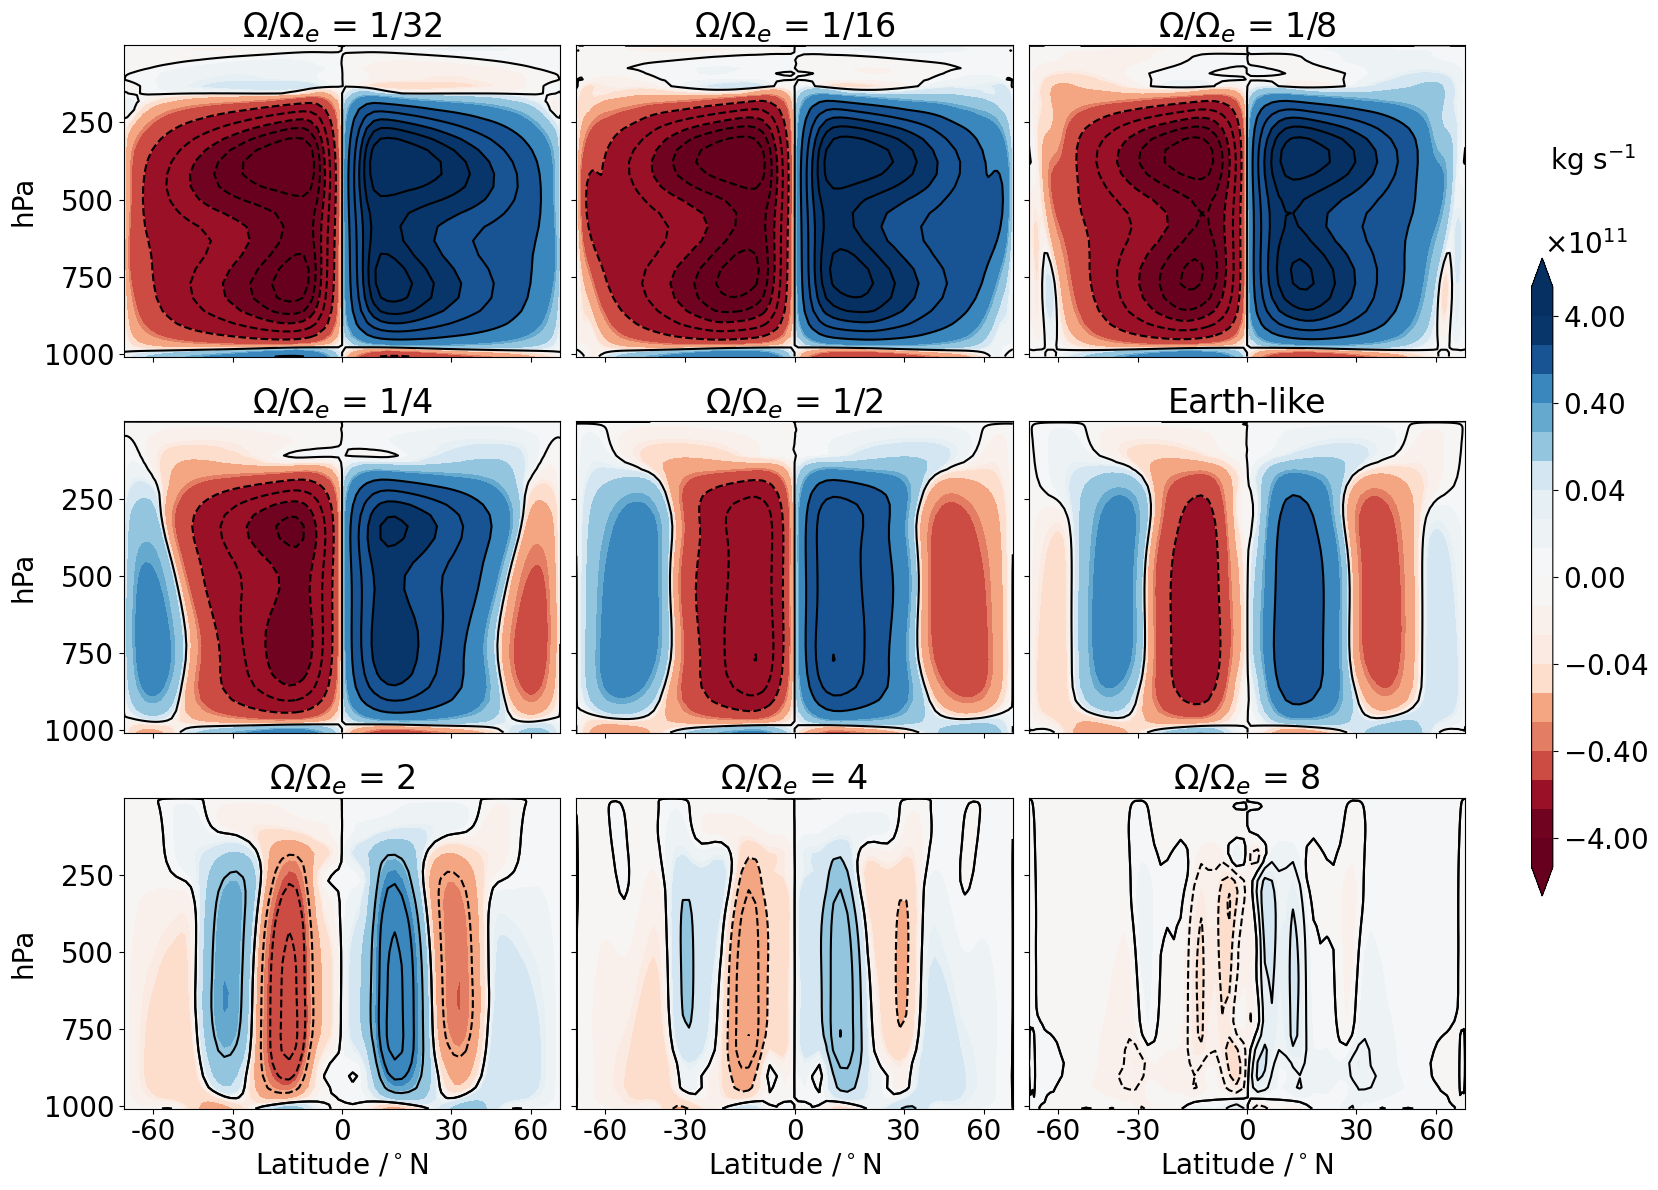

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from matplotlib.ticker import ScalarFormatter

# Constants
figsize = (18, 12)
ticks_deg = np.array([-60, -30, 0, 30, 60])
vmin, vmax = -5e11, 5.1e11
cmap = 'RdBu'
levels = np.array([-6e11, -4e11, -3e11, -1e11, -0.4e11, -0.3e11, -0.1e11,
                   -0.04e11, -0.03e11, -0.01e11, 0, 0.01e11, 0.03e11, 0.04e11, 0.1e11,
                   0.3e11, 0.4e11, 1e11, 3e11, 4e11, 6e11])
titles = [
    r'$\Omega/\Omega_e$ = 1/32', r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1/8',
    r'$\Omega/\Omega_e$ = 1/4', r'$\Omega/\Omega_e$ = 1/2', 'Earth-like',
    r'$\Omega/\Omega_e$ = 2', r'$\Omega/\Omega_e$ = 4', r'$\Omega/\Omega_e$ = 8'
]

# Create figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=figsize, sharey='row', sharex='col')
ax = ax.ravel()

# Meshgrid for plotting
x, y = np.meshgrid(np.sin(np.deg2rad(z1.lat)), z1.plev / 100)

# Plotting
for i, axis in enumerate(ax):
    cont = axis.contourf(x, y, z1[i], cmap=cmap, levels=levels,
                         norm=SymLogNorm(linthresh=0.1e11, linscale=0.5, vmin=-4e11, vmax=4e11), extend='both')

    cont_interval = 1e11 if i < 4 else 1e11
    axis.contour(x, y, z1[i], colors='k', levels=np.arange(vmin, vmax, cont_interval))
    #axis.contour(x, y, z2[i], colors='lightgrey', levels=np.arange(vmin, vmax, cont_interval))

    axis.xaxis.set_ticks(np.sin(np.deg2rad(ticks_deg)))
    axis.set_xticklabels(ticks_deg)
    axis.set_title(titles[i], fontsize=24)
    #axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))

    if i % 3 == 0:
        axis.invert_yaxis()
        axis.set_ylabel('hPa', size=20)

    if i >= 6:
        axis.set_xlabel('Latitude /' r'$^\circ$N', size=20)
        specific_intervals = {
            6: np.arange(-2e11, 2e11, 0.25e11),
            7: np.arange(-1.5e11, 1.51e11, 0.1e11),
            8: np.arange(-1e11, 1.1e11, 0.02e11)
        }
        if i in specific_intervals:
            axis.contour(x, y, z1[i], colors='k', levels=specific_intervals[i], vmin=vmin, vmax=vmax)
            #axis.contour(x, y, z2[i], colors='grey', levels=specific_intervals[i], vmin=vmin, vmax=vmax)

    #axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))
    axis.xaxis.set_tick_params(labelsize=20)
    axis.yaxis.set_tick_params(labelsize=20)

plt.tight_layout()
cbar = fig.colorbar(cont, ax=ax, shrink=0.6, location='right', pad=0.04, aspect=30)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('kg s$^{-1}$', rotation=0, fontsize=20, labelpad=-40, y=1.25)
# Set colorbar to scientific notation
cbar.formatter = ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
offset_text = cbar.ax.yaxis.offsetText
offset_text.set_fontsize(20)
offset_text.set_x(4.5)

plt.savefig('Figures/mastrfu.pdf')

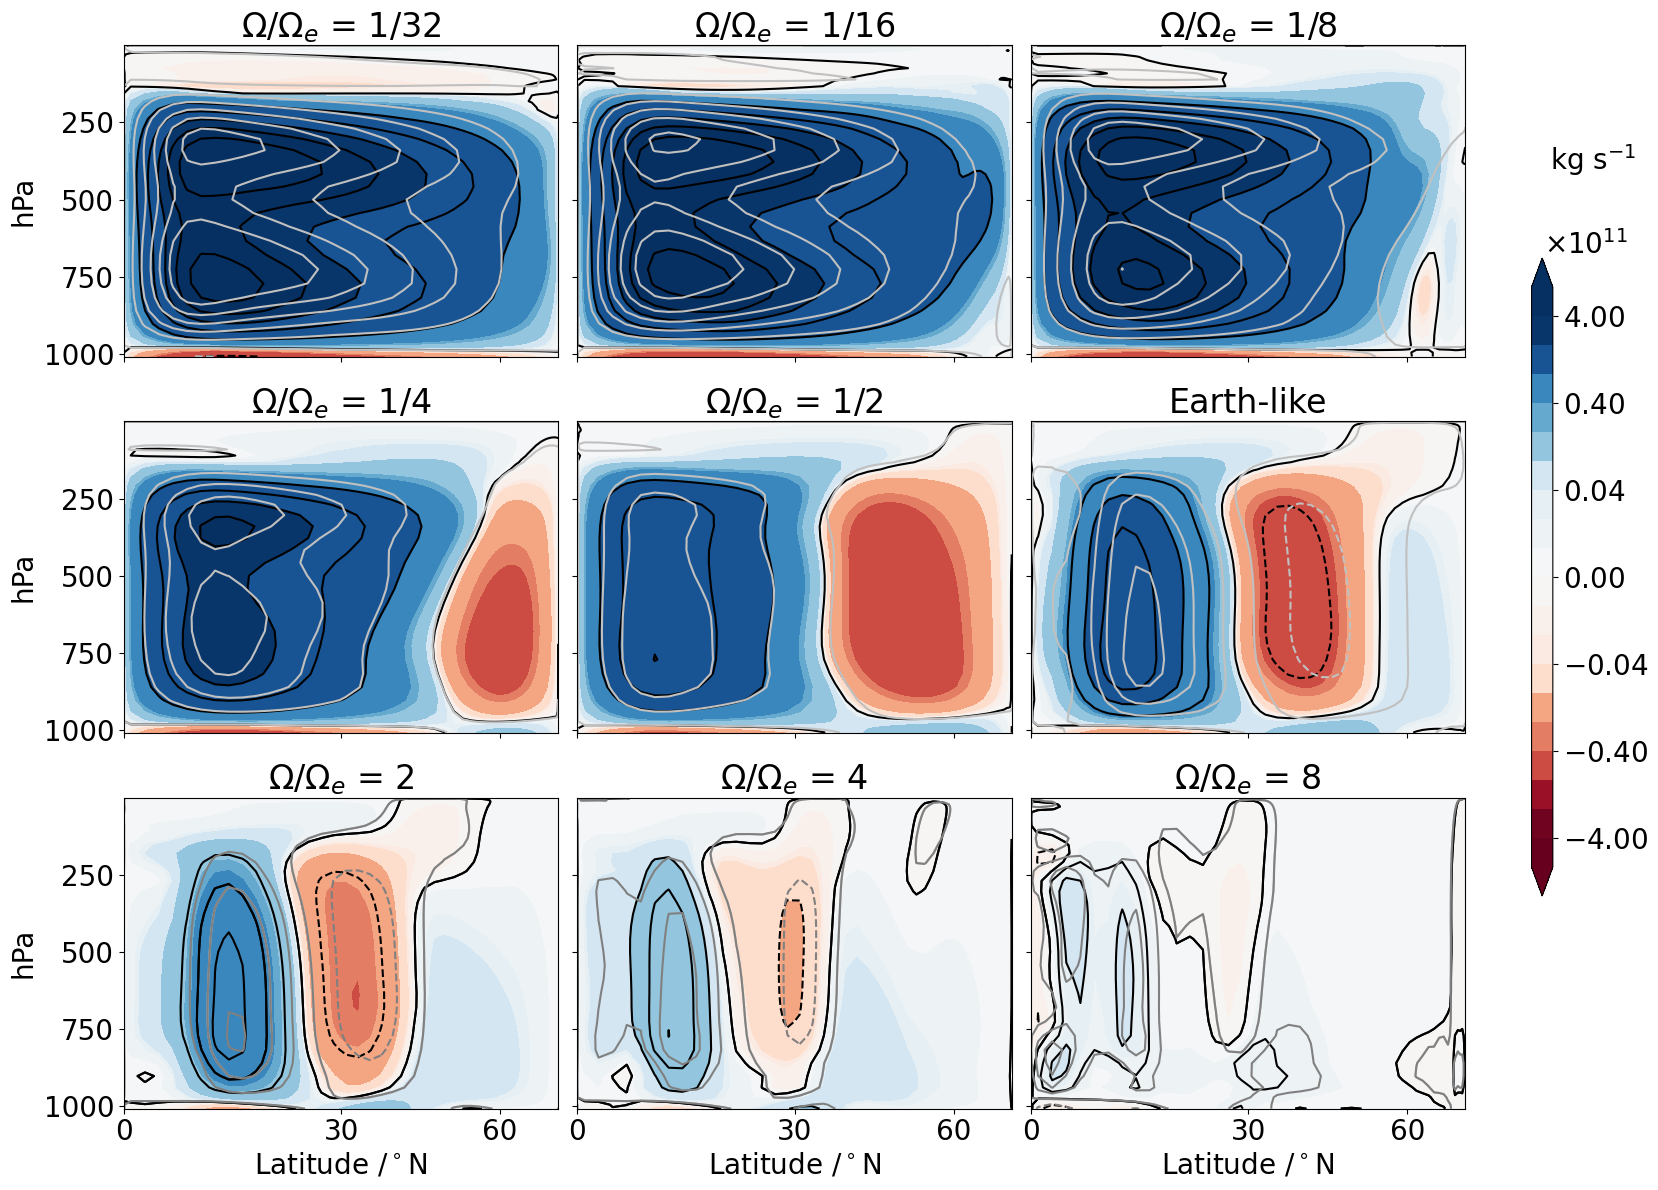

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from matplotlib.ticker import ScalarFormatter

# Constants
figsize = (18, 12)
ticks_deg = np.array([-60, -30, 0, 30, 60])
vmin, vmax = -5e11, 5.1e11
cmap = 'RdBu'
levels = np.array([-6e11, -4e11, -3e11, -1e11, -0.4e11, -0.3e11, -0.1e11,
                   -0.04e11, -0.03e11, -0.01e11, 0, 0.01e11, 0.03e11, 0.04e11, 0.1e11,
                   0.3e11, 0.4e11, 1e11, 3e11, 4e11, 6e11])
titles = [
    r'$\Omega/\Omega_e$ = 1/32', r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1/8',
    r'$\Omega/\Omega_e$ = 1/4', r'$\Omega/\Omega_e$ = 1/2', 'Earth-like',
    r'$\Omega/\Omega_e$ = 2', r'$\Omega/\Omega_e$ = 4', r'$\Omega/\Omega_e$ = 8'
]

# Create figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=figsize, sharey='row', sharex='col')
ax = ax.ravel()

# Meshgrid for plotting
x, y = np.meshgrid(np.sin(np.deg2rad(z1.lat)), z1.plev / 100)

# Plotting
for i, axis in enumerate(ax):
    cont = axis.contourf(x, y, z1[i], cmap=cmap, levels=levels,
                         norm=SymLogNorm(linthresh=0.1e11, linscale=0.5, vmin=-4e11, vmax=4e11), extend='both')

    cont_interval = 1e11 if i < 5 else 0.5e11
    axis.contour(x, y, z1[i], colors='k', levels=np.arange(vmin, vmax, cont_interval))
    axis.contour(x, y, z2[i], colors='silver', levels=np.arange(vmin, vmax, cont_interval))

    axis.xaxis.set_ticks(np.sin(np.deg2rad(ticks_deg)))
    axis.set_xticklabels(ticks_deg)
    axis.set_title(titles[i], fontsize=24)
    axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))

    if i % 3 == 0:
        axis.invert_yaxis()
        axis.set_ylabel('hPa', size=20)

    if i >= 6:
        axis.set_xlabel('Latitude /' r'$^\circ$N', size=20)
        specific_intervals = {
            6: np.arange(-2e11, 2e11, 0.25e11),
            7: np.arange(-1.5e11, 1.51e11, 0.1e11),
            8: np.arange(-1e11, 1.1e11, 0.02e11)
        }
        if i in specific_intervals:
            axis.contour(x, y, z1[i], colors='k', levels=specific_intervals[i], vmin=vmin, vmax=vmax)
            axis.contour(x, y, z2[i], colors='grey', levels=specific_intervals[i], vmin=vmin, vmax=vmax)

    #axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))
    axis.xaxis.set_tick_params(labelsize=20)
    axis.yaxis.set_tick_params(labelsize=20)

plt.tight_layout()
cbar = fig.colorbar(cont, ax=ax, shrink=0.6, location='right', pad=0.04, aspect=30)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('kg s$^{-1}$', rotation=0, fontsize=20, labelpad=-40, y=1.25)
# Set colorbar to scientific notation
cbar.formatter = ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
offset_text = cbar.ax.yaxis.offsetText
offset_text.set_fontsize(20)
offset_text.set_x(4.5)

plt.savefig('Figures/mastrfu.pdf')

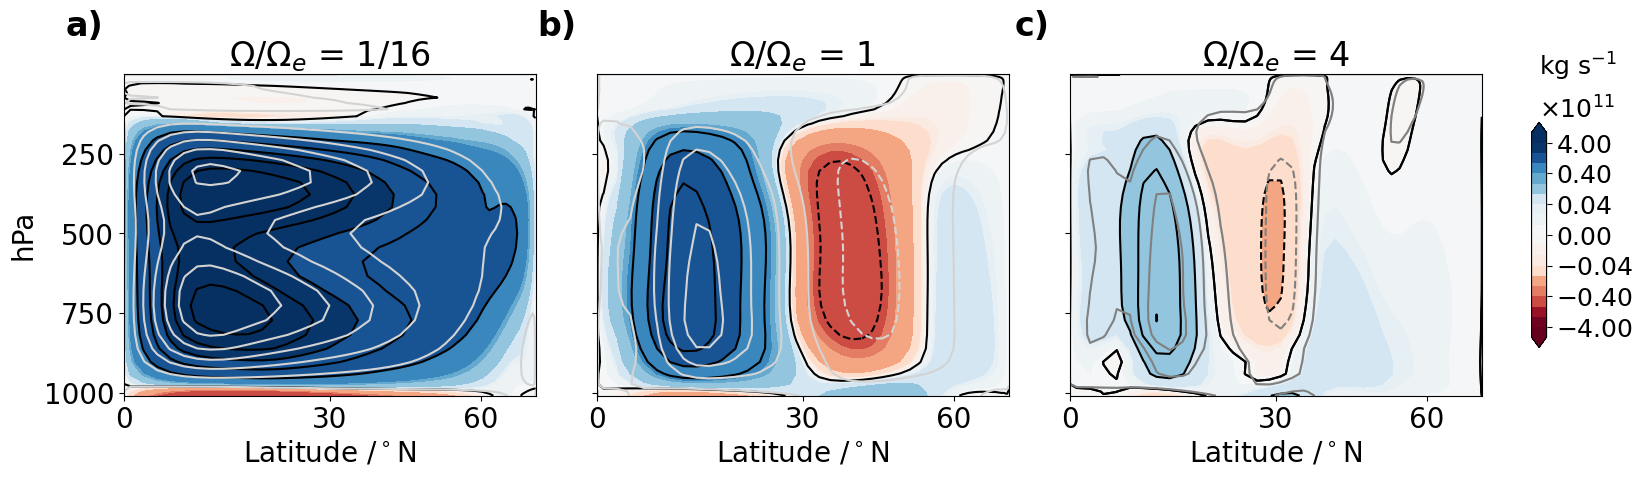

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from matplotlib.ticker import ScalarFormatter

z1 = z1.sel(rotation=['1/16','Earth-like', '4'])
z2 = z2.sel(rotation=['1/16','Earth-like', '4'])

# Constants
figsize = (18, 5)
ticks_deg = np.array([-60, -30, 0, 30, 60])
vmin, vmax = -5e11, 5.1e11
cmap = 'RdBu'
levels = np.array([-6e11, -4e11, -3e11, -1e11, -0.4e11, -0.3e11, -0.1e11,
                   -0.04e11, -0.03e11, -0.01e11, 0, 0.01e11, 0.03e11, 0.04e11, 0.1e11,
                   0.3e11, 0.4e11, 1e11, 3e11, 4e11, 6e11])
titles = [ r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1', 
          r'$\Omega/\Omega_e$ = 4'
]


# Create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize, sharey='row', sharex='col')
ax = ax.ravel()

# Meshgrid for plotting
x, y = np.meshgrid(np.sin(np.deg2rad(z1.lat)), z1.plev / 100)

subplot_labels = ['a)', 'b)', 'c)']

# Plotting
for i, axis in enumerate(ax):

    axis.text(-0.05, 1.2, subplot_labels[i], transform=axis.transAxes, 
                fontsize=24, fontweight='bold', va='top', ha='right')
    
    cont = axis.contourf(x, y, z1[i], cmap=cmap, levels=levels,
                         norm=SymLogNorm(linthresh=0.1e11, linscale=0.5, vmin=-4e11, vmax=4e11), extend='both')

    cont_interval = 1e11 if i < 1 else 0.5e11
    axis.contour(x, y, z1[i], colors='k', levels=np.arange(vmin, vmax, cont_interval))
    axis.contour(x, y, z2[i], colors='lightgrey', levels=np.arange(vmin, vmax, cont_interval))

    axis.xaxis.set_ticks(np.sin(np.deg2rad(ticks_deg)))
    axis.set_xticklabels(ticks_deg)
    axis.set_title(titles[i], fontsize=24)
    axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))

    if i == 0:
        axis.invert_yaxis()
        axis.set_ylabel('hPa', size=20)

    if i >= 2:
        specific_intervals = {
            1: np.arange(-2e11, 2e11, 0.25e11),
            2: np.arange(-1.5e11, 1.51e11, 0.1e11)
        }
        if i in specific_intervals:
            axis.contour(x, y, z1[i], colors='k', levels=specific_intervals[i], vmin=vmin, vmax=vmax)
            axis.contour(x, y, z2[i], colors='grey', levels=specific_intervals[i], vmin=vmin, vmax=vmax)

    #axis.set_xlim(0, np.sin(np.deg2rad(z1.lat[0])))
    axis.xaxis.set_tick_params(labelsize=20)
    axis.yaxis.set_tick_params(labelsize=20)
    axis.set_xlabel('Latitude /' r'$^\circ$N', size=20)

plt.tight_layout()
cbar = fig.colorbar(cont, ax=ax, shrink=0.7, location='right', pad=0.03, aspect=15)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('kg s$^{-1}$', rotation=0, fontsize=18, labelpad=-40, y=1.4)
# Set colorbar to scientific notation
cbar.formatter = ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
offset_text = cbar.ax.yaxis.offsetText
offset_text.set_fontsize(18)
offset_text.set_x(5.5)

plt.savefig('Figures/mastrfu.pdf')